#  Credit Card Users Churn Prediction:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV, RandomizedSearchCV,StratifiedKFold, cross_val_score

#libraries for UP/Down sampling, Imputation and Pipelines
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,BaggingClassifier)
from xgboost import XGBClassifier

### Load and Explore Data

In [2]:
data = pd.read_csv('BankChurners.csv')
df= data.copy()
print(f'There is {df.shape[0]} rows and {df.shape[1]} columns in the dataset')
np.random.seed(4)
df.sample(10)

There is 10127 rows and 21 columns in the dataset


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
3536  717886008  Existing Customer            63      M                1   
8876  714282333  Existing Customer            49      F                4   
4628  717490008  Existing Customer            43      M                4   
2123  720714933  Existing Customer            62      F                1   
2774  717978033  Existing Customer            36      F                1   
8473  824915208  Existing Customer            44      F                3   
6420  720742083  Attrited Customer            48      F                4   
7907  719862258  Existing Customer            38      F                2   
2518  717124983  Existing Customer            62      F                1   
3252  721295658  Existing Customer            62      M                1   

     Education_Level Marital_Status Income_Category Card_Category  \
3536     High School         Single  Less than $40K          Blue   
8876         College        Married  Less than $40K          Blue   
4628        Graduate       Divorced    $80K - $120K          Blue   
2123        Graduate        Married  Less than $40K          Blue   
2774     High School         Single  Less than $40K          Blue   
8473       Doctorate        Married         Unknown          Blue   
6420         Unknown        Married  Less than $40K          Blue   
7907      Uneducated         Single         Unknown          Blue   
2518      Uneducated        Married     $40K - $60K          Blue   
3252         Unknown         Single    $80K - $120K          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3536              51  ...                       3                      2   
8876              36  ...                       1                      2   
4628              36  ...                       1                      1   
2123              49  ...                       2                      2   
2774              36  ...                       3                      4   
8473              40  ...                       1                      1   
6420              36  ...                       3                      3   
7907              28  ...                       3                      3   
2518              43  ...                       1                      1   
3252              55  ...                       1                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3536        6102.0                    0           6102.0   
8876        3244.0                    0           3244.0   
4628       19188.0                 1622          17566.0   
2123        3143.0                 2517            626.0   
2774        5257.0                 1572           3685.0   
8473        7212.0                 1008           6204.0   
6420        2740.0                 2425            315.0   
7907        5666.0                 1393           4273.0   
2518        4760.0                    0           4760.0   
3252       34516.0                 2517          31999.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3536                 0.639             4527              67   
8876                 0.765             7495              97   
4628                 0.750             4282              52   
2123                 0.625             1323              25   
2774                 0.732             2822              73   
8473                 0.727             5169              82   
6420                 0.816             2431              46   
7907                 0.840             5015              90   
2518                 0.564             1459              20   
3252                 0.945             3975              63   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
3536                0.558                  0.000  
8876                0.540                  0.000  
4628                0.926                  0.085  
2123         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* Of the 21 columns, 6 of them are in object datatype and the rest are numerical. 
* We see that all the variables have no missing values.

**Checking the total unique values in all columns**

In [4]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

* We can drop the CLIENTNUM  column as its unique to each customer and not useful for the model.
* We will also convert all object datatype to category for further processing.
* The `Dependent_count` variable only has 6 unique values; from 0 to 5. As the dependents are people, we will convert this variable to category.

## Data Pre-Processing:


## Fixing Datatypes

In [5]:
#dropping CLIENTNUM column
df.drop(['CLIENTNUM'],axis=1,inplace = True)
df['Dependent_count'] = df['Dependent_count'].astype('category')
cols = df.select_dtypes(['object']) #selecting all object datatype
for i in cols.columns:
    df[i] = df[i].astype('category') #converting them to category datatype

  **Summary of Numerical Variables**

In [6]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- The range in  `Age`  variable is between 26-73 yrs and we see that the mean and median here are equal.
- `Months_on_book` variable seems to have outliers in the lower end. From the table we see that majority of customers have been with the bank longer.
- The mean in `Credit_Limit` and `Avg_Open_To_Buy`variables are very high compared to median and we see that there might be outliers in the higher end for both.
- Columns `Total_Trans_Amt`, `Total_Trans_Ct`,`Total_Amt_Chng_Q4_Q1` and `Total_Ct_Chng_Q4_Q1` might have outliers on the high end as there is a large difference between 75th percentile and max values.

**Checking the count of unique category in each categorical variables**

In [7]:
cat_cols = df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------------------------

- The target variable `Attrition_Flag` is skewed with only 1627 Attrited Customers.
- We see a category **Unknown** in the variables `Education_Level`,`Marital_Status` and `Income_Category`. 
- We need to analyse further to decide if this category can be treated as missing value.

**Summary of Categorical Variables**

In [8]:
df.describe(include="category").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Dependent_count  10127      6                  3  2732
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

**Observations:**
* We have slightly more Female Customers
*  Majority of customers have atleast 3 dependent
* Most Customers are Graduate by Education and Married and belong to the Less than 40K Income_category.
* We see that the Blue Card category is the most popular.

## Exploratory Data Analysis

In [9]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
def Uni_num (var,figsize=(9,9)):
    fig,(ax_box,ax_hist) = plt.subplots(2,1,sharex=True ,
                                        figsize=figsize,
                                        gridspec_kw = {"height_ratios": (.35, .65)})
    sns.boxplot(var, ax=ax_box, showmeans=True, color='orange')
    sns.histplot(data=var, ax=ax_hist,kde=True)
    ax_hist.axvline(np.mean(var), color='m', linewidth=1, linestyle='--')
    ax_hist.axvline(np.median(var), color='g', linewidth=1, linestyle='--')

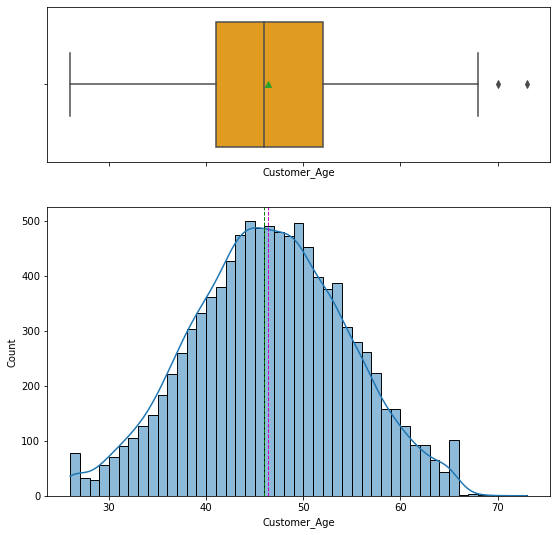

In [10]:
Uni_num(df.Customer_Age)

* Customer_Age variable has a fairly normal distribution with few outliers in the higher end. 

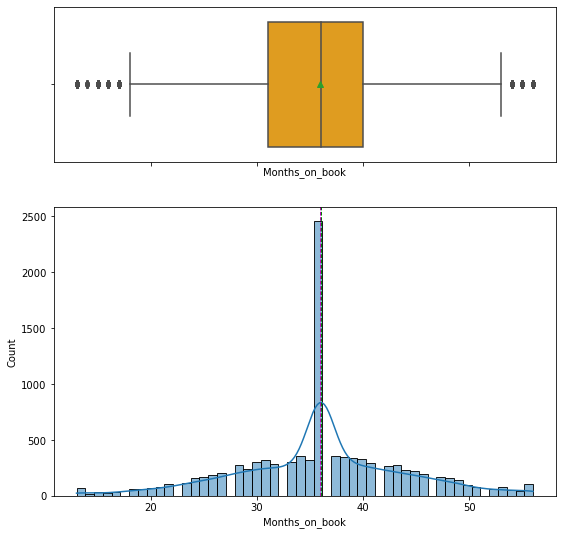

In [11]:
Uni_num(df.Months_on_book)

* The variable sees a huge spike at Month 36(or 3 yrs), with few outliers on both ends

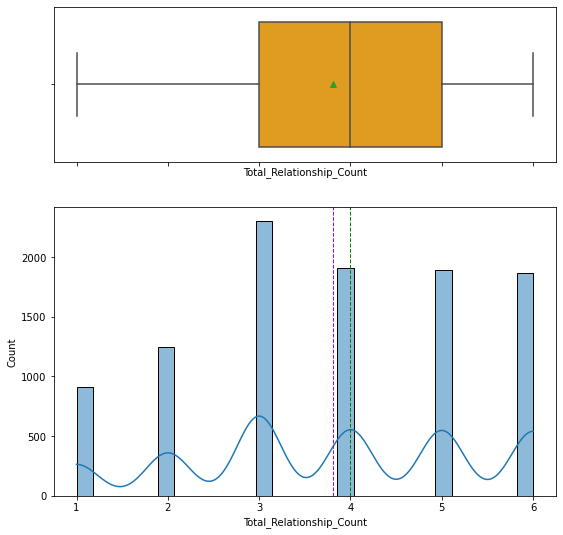

In [12]:
Uni_num(df.Total_Relationship_Count)

* Majority of customers have three or more products with the bank.
* There are no outliers in this variable

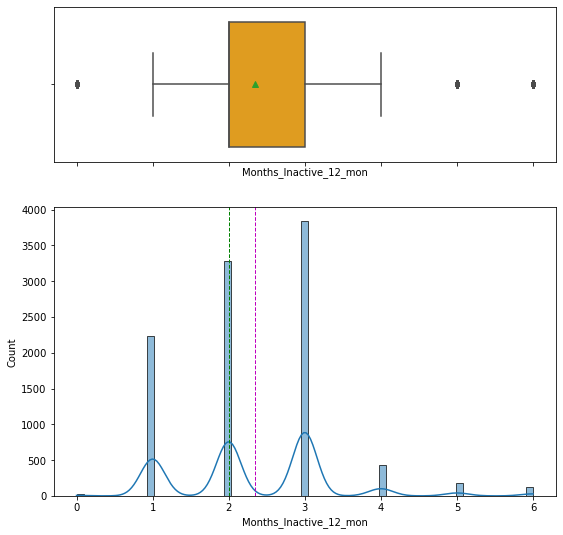

In [13]:
Uni_num(df.Months_Inactive_12_mon)

* Majority of customer inactivity is three months or less. 

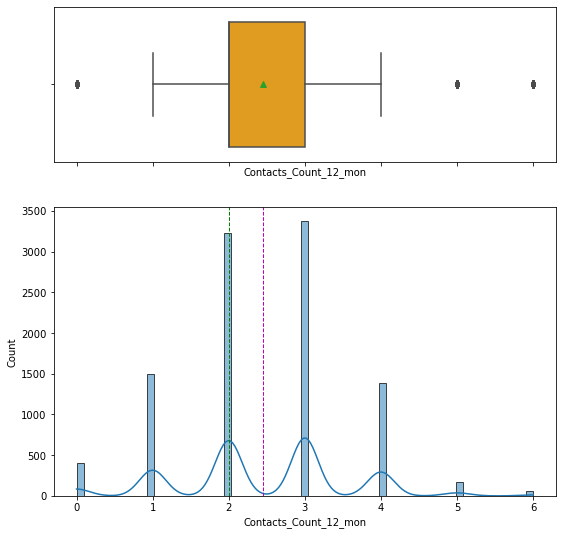

In [14]:
Uni_num(df.Contacts_Count_12_mon)

* Most customers contact the bank atleast 2 to 3 times in a year. 

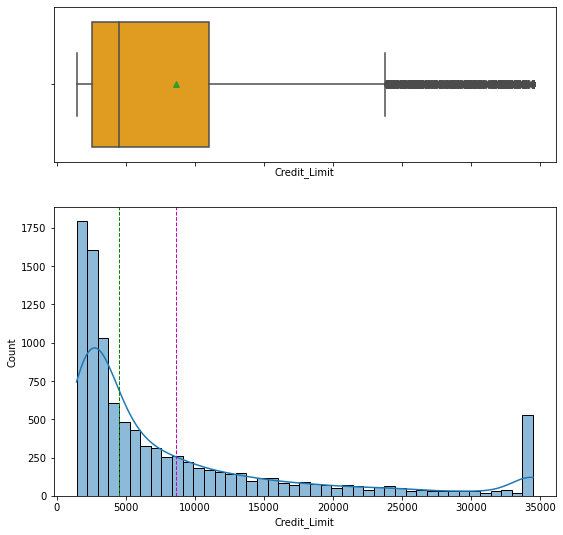

In [15]:
Uni_num(df.Credit_Limit)

* Credit_Limit is right-skewed with heavy outliers in the higher end.
* We will analyse this variable with Card_Category for more information on the outliers

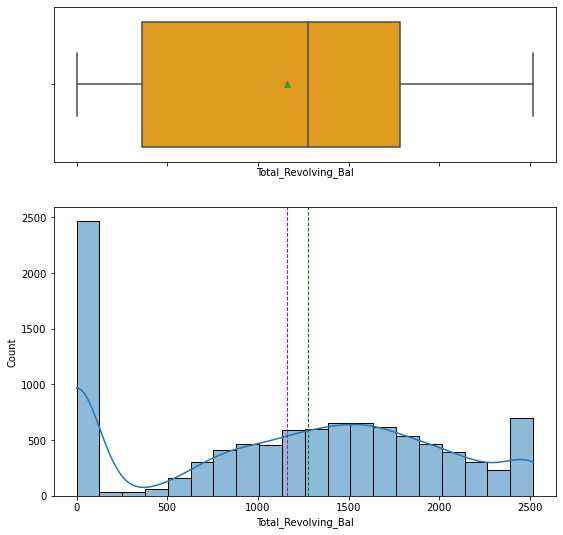

In [16]:
Uni_num(df.Total_Revolving_Bal)

* We see that majority of Customers have a Total_Revolving_Bal of 0; suggesting that they pay the full bill amount monthly.
* Let's check the distribution for customers who dont pay the full amount

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

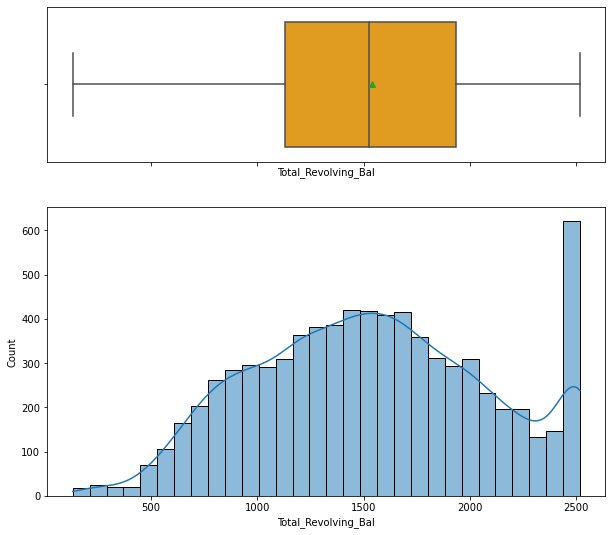

In [17]:
df2 = df[(df.Total_Revolving_Bal>0)]
fig,(ax_box,ax_hist) = plt.subplots(2,1,sharex=True ,
                                        figsize=(10,9),
                                        gridspec_kw = {"height_ratios": (.35, .65)})
sns.boxplot(df2.Total_Revolving_Bal, ax=ax_box, showmeans=True, color='orange')
sns.histplot(df2.Total_Revolving_Bal, ax=ax_hist,kde=True)

* The distribution is fairly normal except for the spike in the max end.
* Again, we see no outliers.

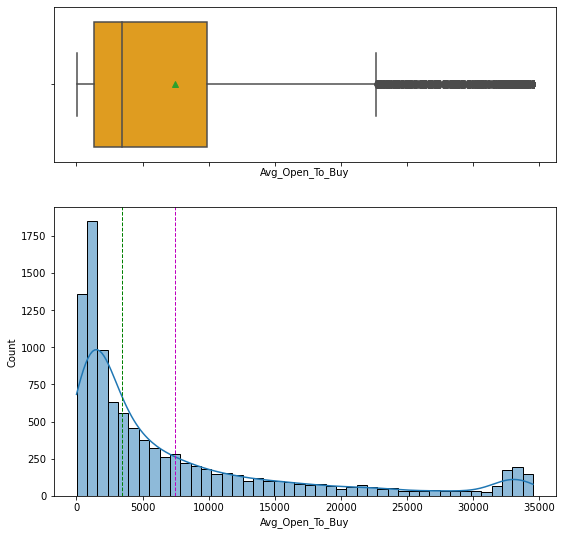

In [18]:
Uni_num(df.Avg_Open_To_Buy)

* The distribution is right-skewed with several outliers in the higher end. 

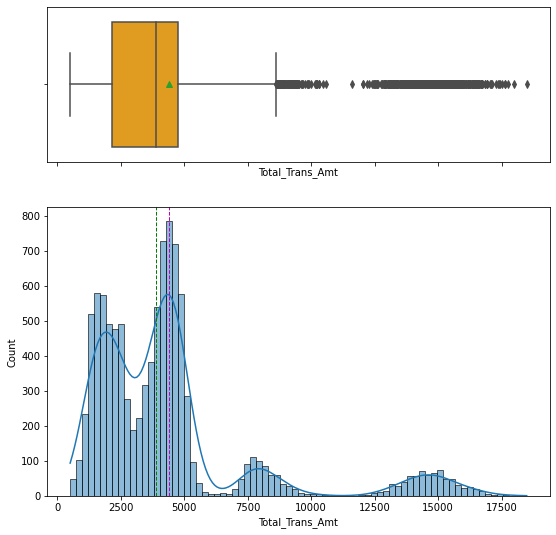

In [19]:
Uni_num(df.Total_Trans_Amt)

* There are several outliers in the higher end for Total transaction amount. 

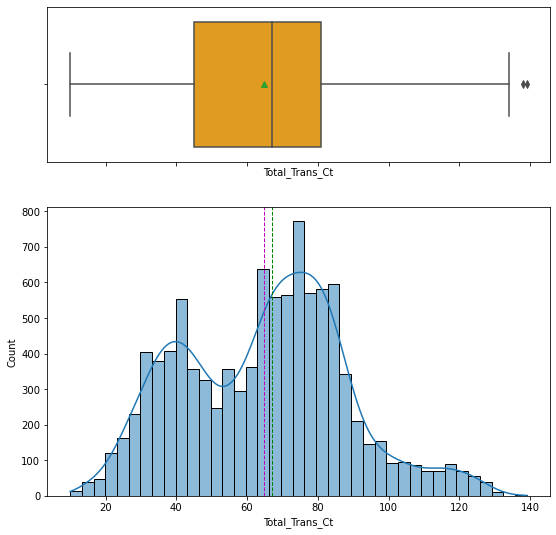

In [20]:
Uni_num(df.Total_Trans_Ct)

* The distribution looks fairly normal with very close mean and median values. 

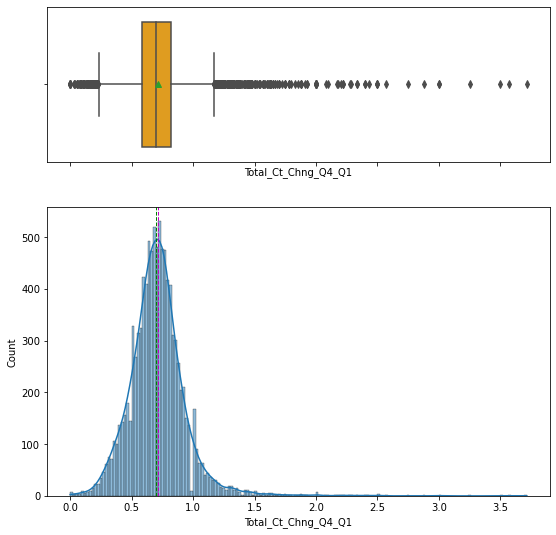

In [21]:
Uni_num(df.Total_Ct_Chng_Q4_Q1)

* There are several outliers on both ends of the quartile despite a fairly normal distribution of the variable.

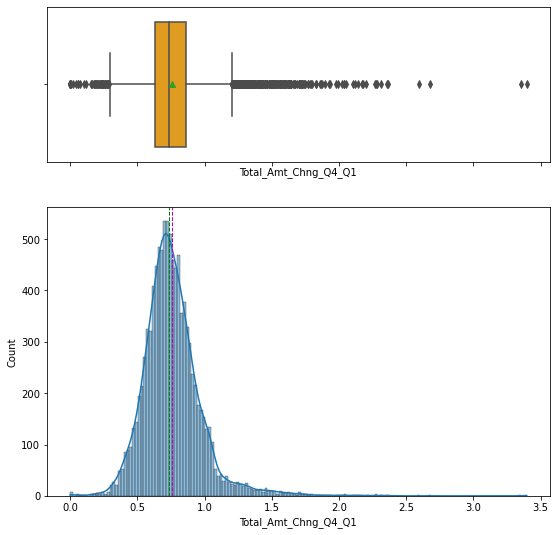

In [22]:
Uni_num(df.Total_Amt_Chng_Q4_Q1)

* The distribution is fairly normal in Total Amount change ration with several outliers on both ends. 

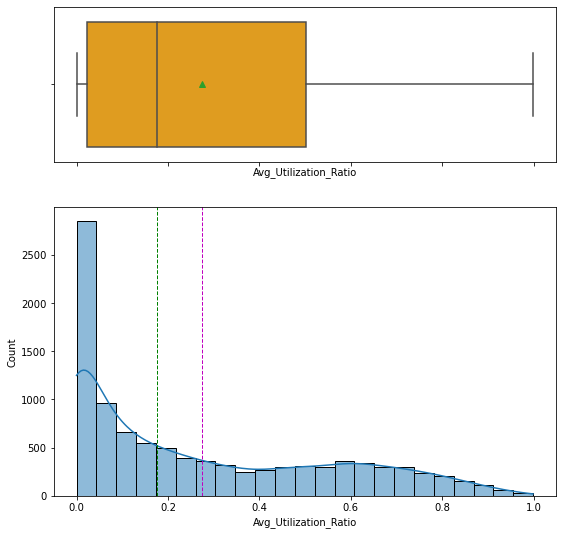

In [23]:
Uni_num(df.Avg_Utilization_Ratio)

* The distribution is right-skewed with no extreme values. 
* Majority of customers have Utilization ratio of 0.0

In [24]:
categorical_val = df.select_dtypes(include='category').columns.tolist()

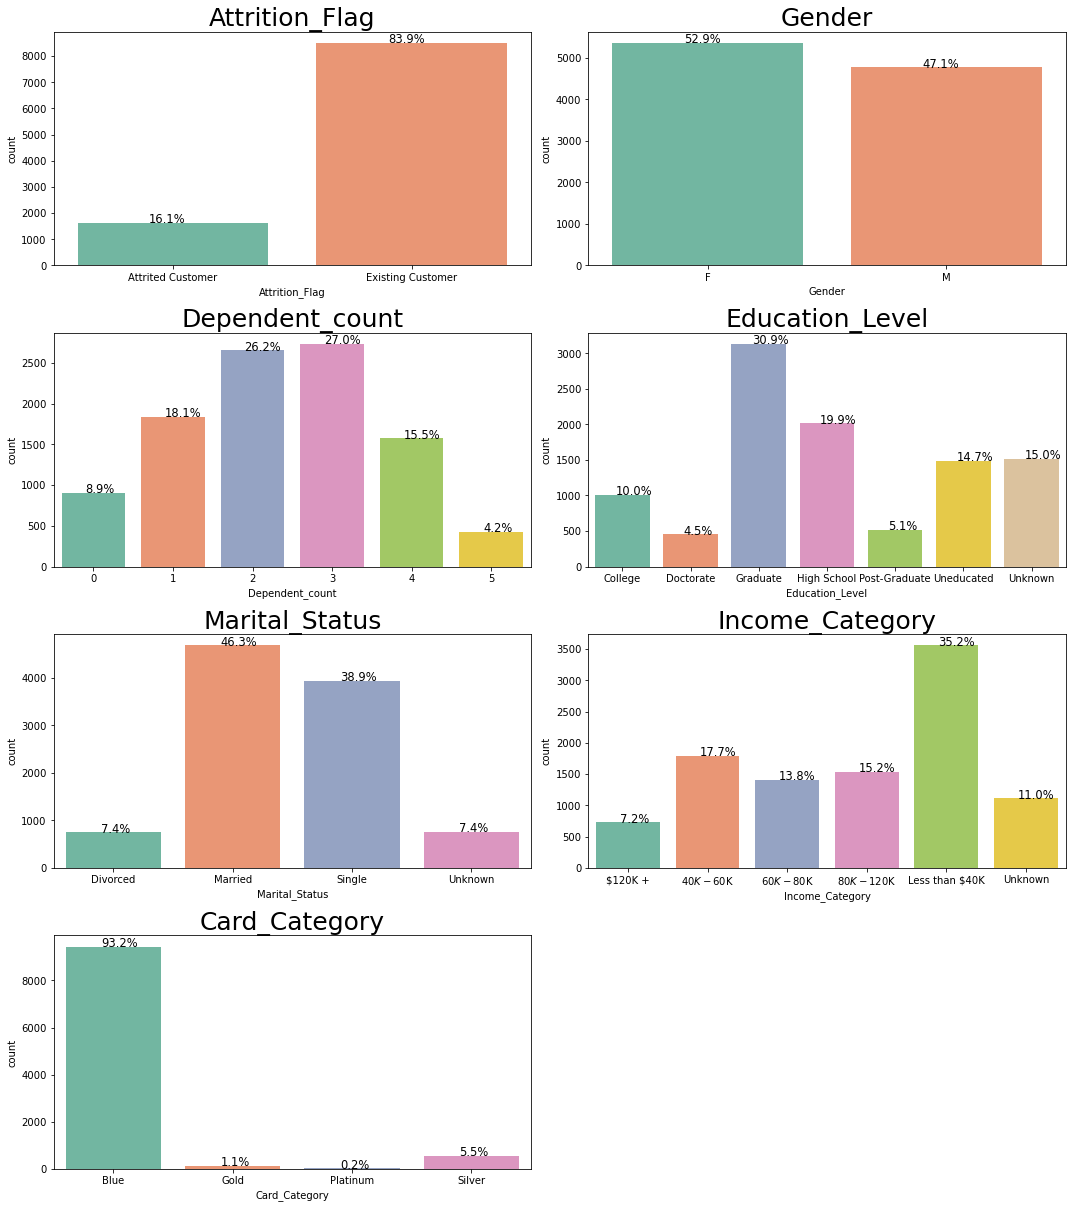

In [25]:
plt.figure(figsize=(15,75))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,2,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Set2')
    plt.tight_layout()
    plt.title(categorical_val[i],fontsize=25)
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 11.5,color='black')# To annonate
        
plt.show()

**Observations**
- The Target variable `Attrition_Flag` is imbalanced with 83.9% Existing customers and only 16.1% Attrited Customers
- In the `Gender` variable, 52.9% are Female and 42.1% Male
- 27% of Customers have atleast 3 dependents with 26.2% have atleast 2 dependents
- 30.9% of customers have a Graduate `Education_Level` with High School coming second at 19.9%. We see that 15% of Customers belong to Unknown category
- Majority of customers at approx 46.3% are married. The `Marital_Status` for 7.4% of customers is Unknown
- Majority of customers at approx 35.2% are in the `Income_Category` of Less than 40 K and approx 11% of customers Income is Unknown
- The Blue `Card_Category` is the most popular with approx 93.2% customers

**Analysing the Dependent variable `Attrition_Flag` with all numerical and categorical variable to check possible realtionships.**

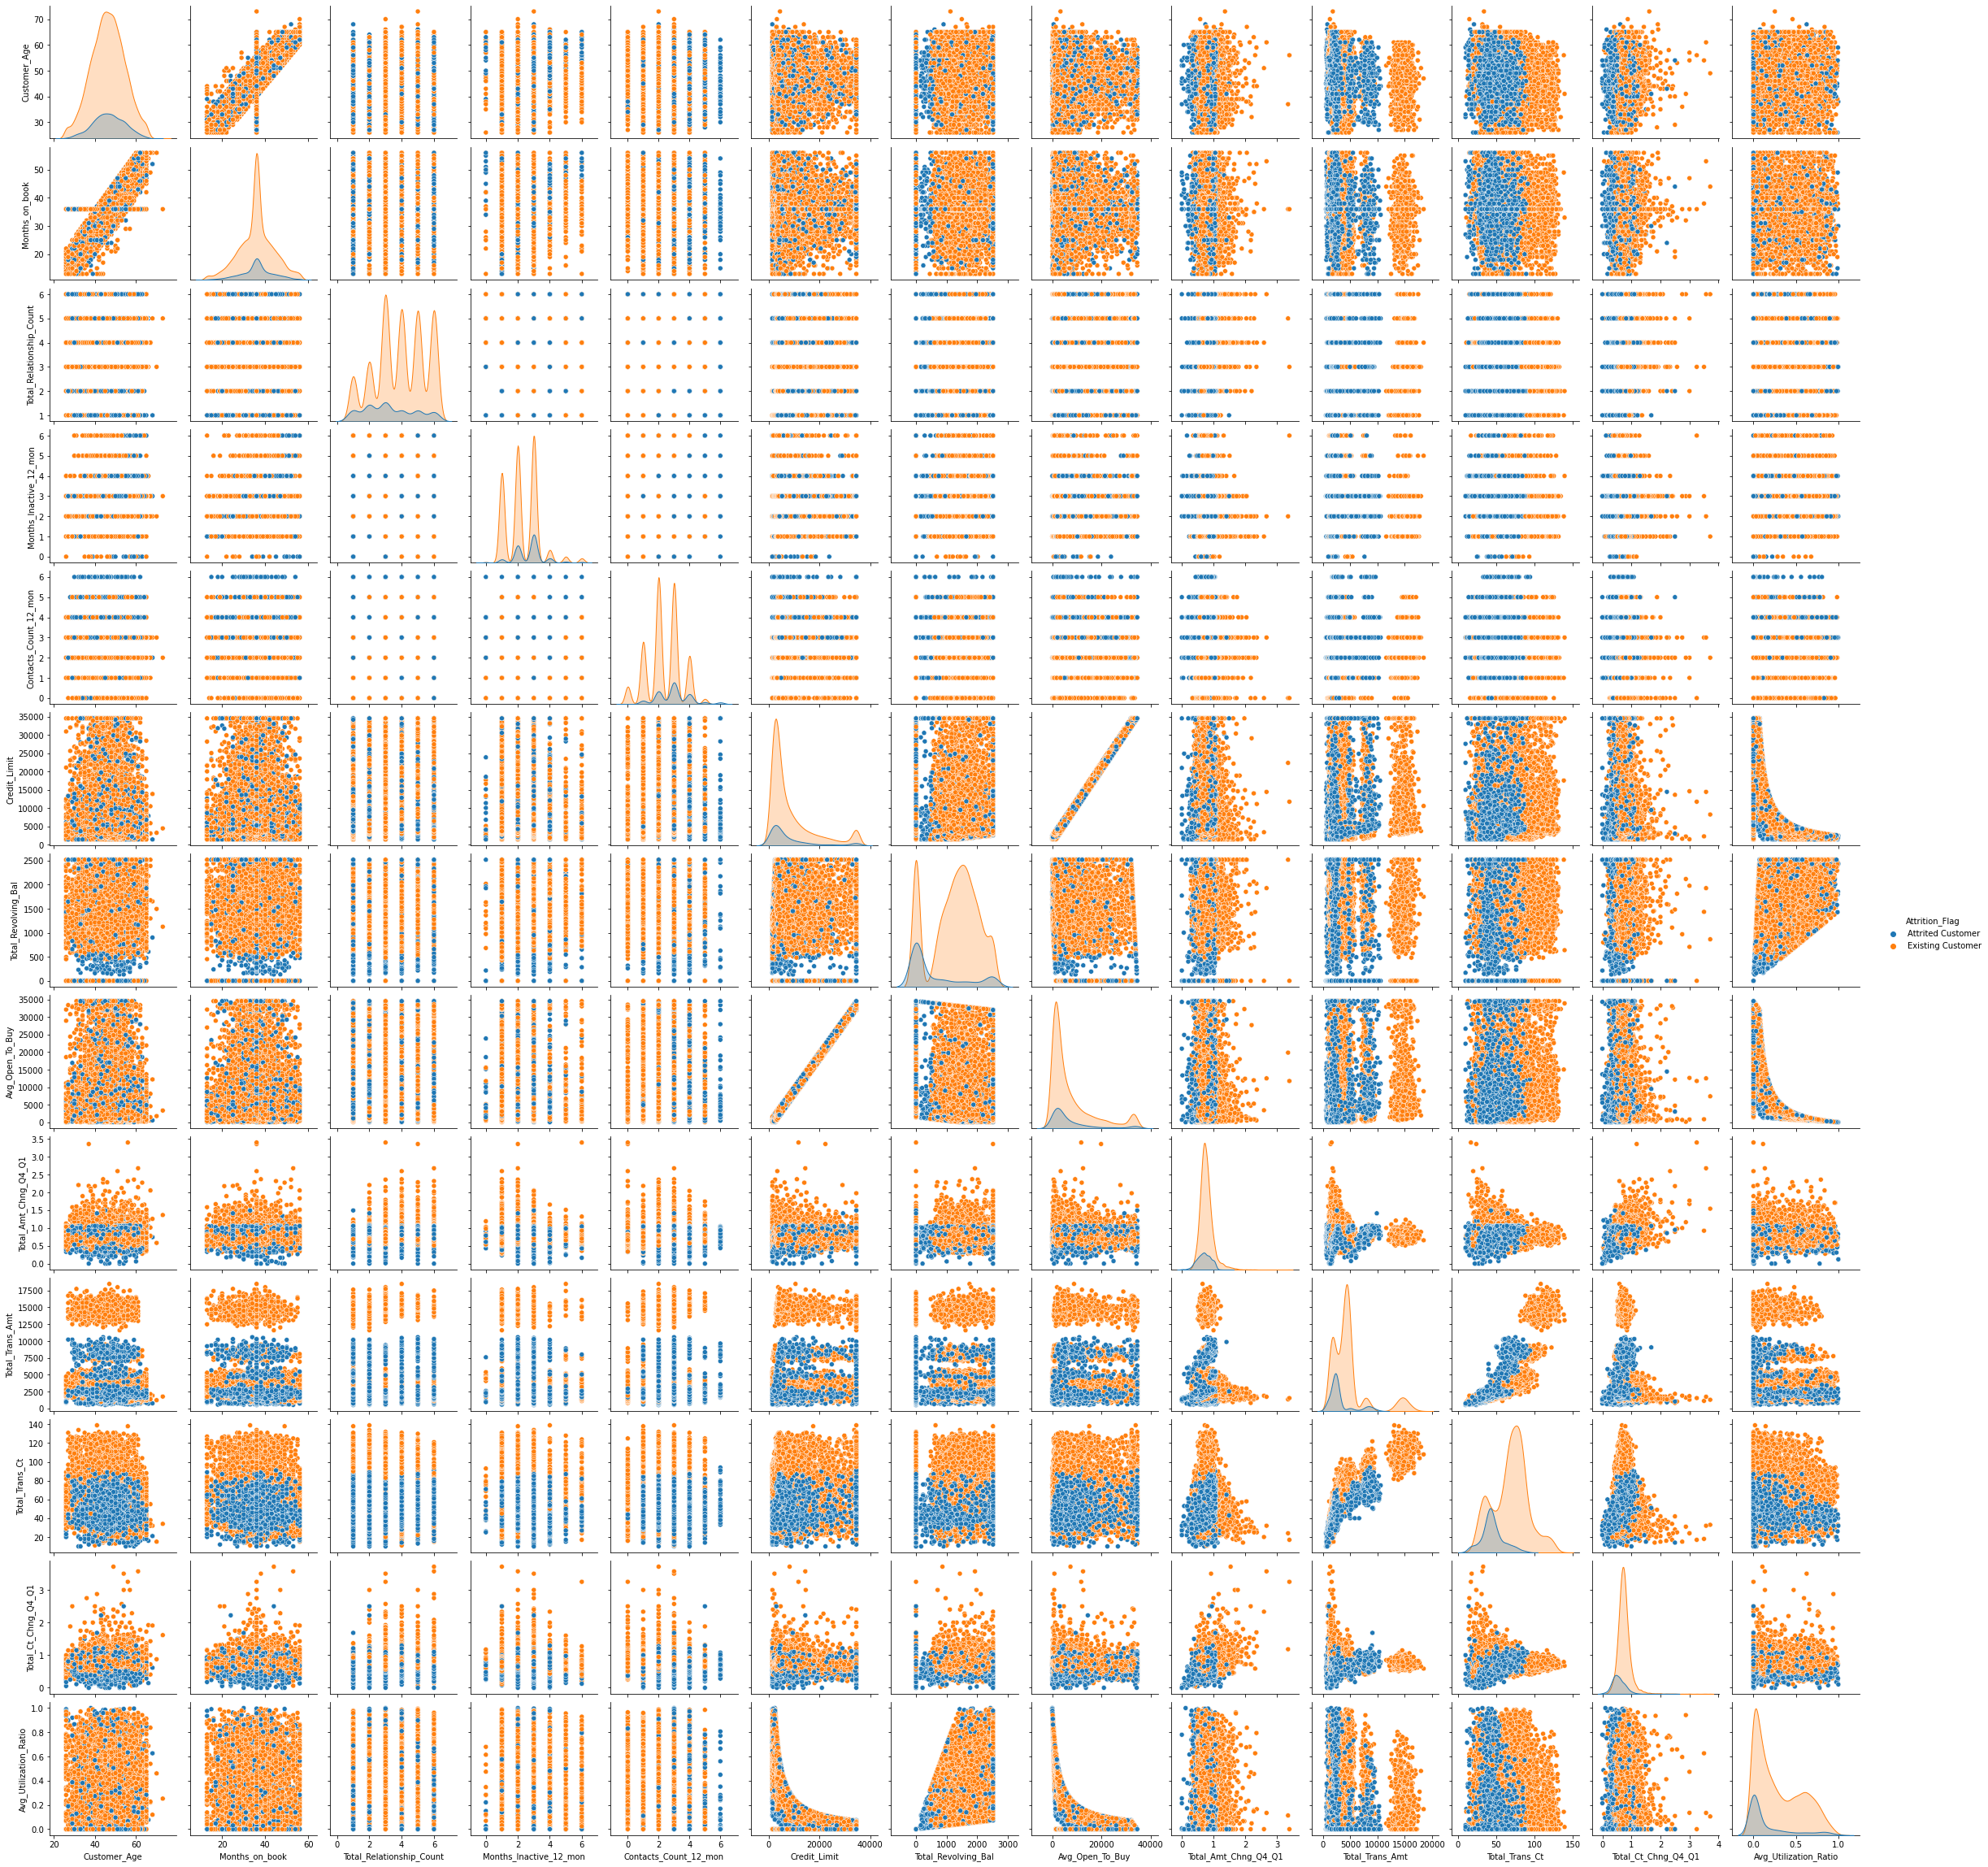

In [26]:
sns.pairplot(data=df,hue='Attrition_Flag')

* There are severe overlaps and no clear distinction between Existing and Attrited Customers.
* We will investigate this with other plots.

In [27]:
#Stacked plot of categorical variables with Personal Loans
def stacked_plot(x):
    sns.set(palette='Set1')
    tab1 = pd.crosstab(x,df['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


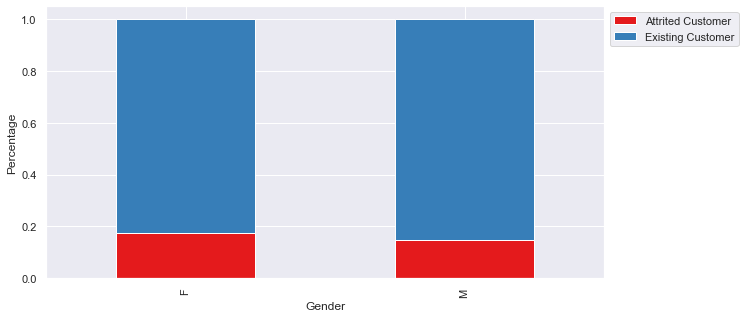

In [28]:
stacked_plot(df.Gender)

* We see that there are slightly more Attrited Female customers than Male customers. This could be because we have more Female customers in this dataset

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


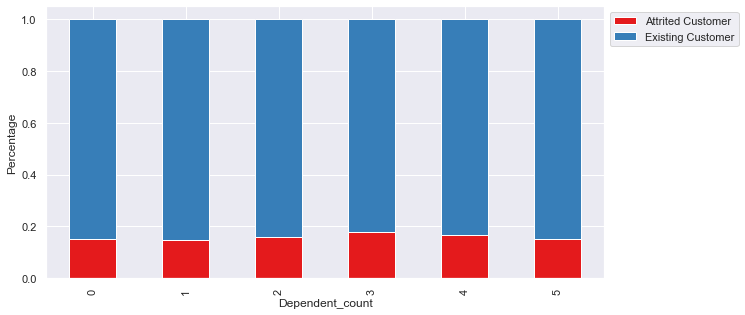

In [29]:
stacked_plot(df.Dependent_count)

* The percentage of Attrited Customers is almost equal across 0,1,4 & 5 dependent counts
* We see a very slight rise in Customers with 2 and 3 dependents. 

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


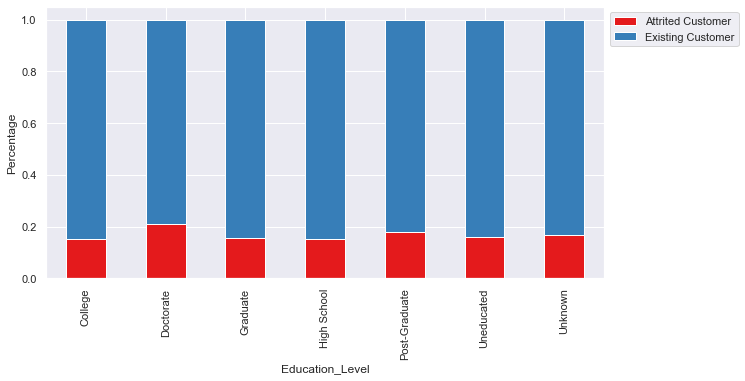

In [30]:
stacked_plot(df.Education_Level)

* The Attrition level is fairly consistent across all Education_Level except Doctorate, which is slightly higher at approx ~20%.
* This need to be further analysed as we only have 4.5% of Doctorate Customers.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


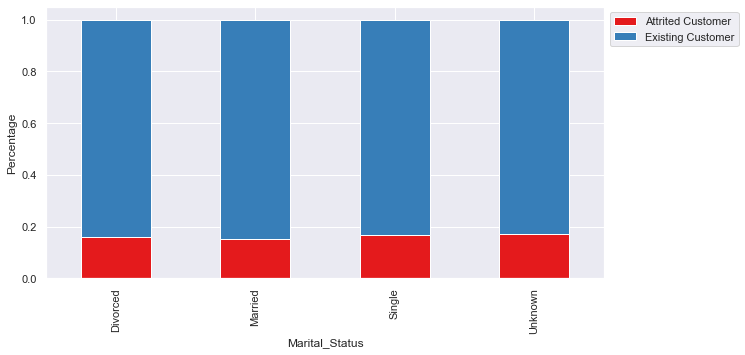

In [31]:
stacked_plot(df.Marital_Status)

* Here too we see that the Attrition Percentage is almost equal across all Marital_Status categories. 
* Married and Single Customers make about 85% of the Customer base, and still have equal Attrition compared to Divorced and Unknown categories. 

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


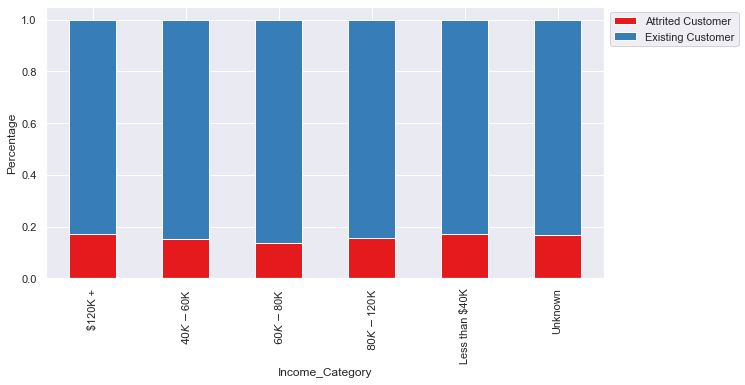

In [32]:
stacked_plot(df.Income_Category)

* The percentage of Attrited_Customers is almost the same across all Income_Category.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


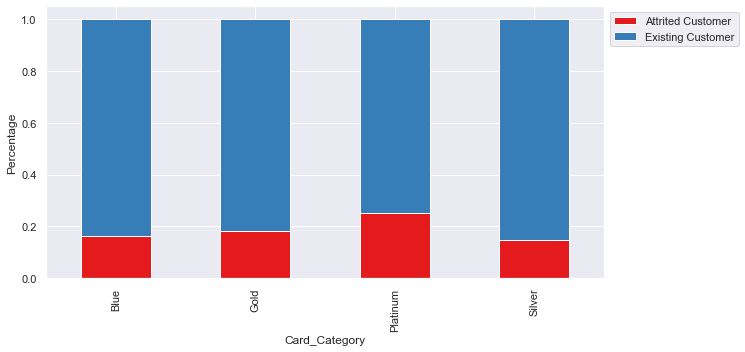

In [33]:
stacked_plot(df.Card_Category)

* Customers with Platinum Cards see slight higher Attrition than customers with other card types..

**Insights from the Analysis**
* Interestingly, we note that the among categorical variables the percentage of Attrited Customers seems to be fairly equal across all categories of all the Variables. 
* Despite having a large imbalance in the proportions across the categories; the attrition however is quite similar. 
* There seems to be no significant categorical variable that shows a strong indicator for Attrition. 

### Correlation Matrix
    * A Correlation Matrix shows the possible correlation coefficients for all possible pairs of variables
    * This will help us visualize any patterns in the dataset
    * A Positive Correlation between two variables indicate that the coefficient of one will rise w.r.t the other.
    * A Negative Correlation between variables indicate that the coefficient of one will decrease w.r.t other.

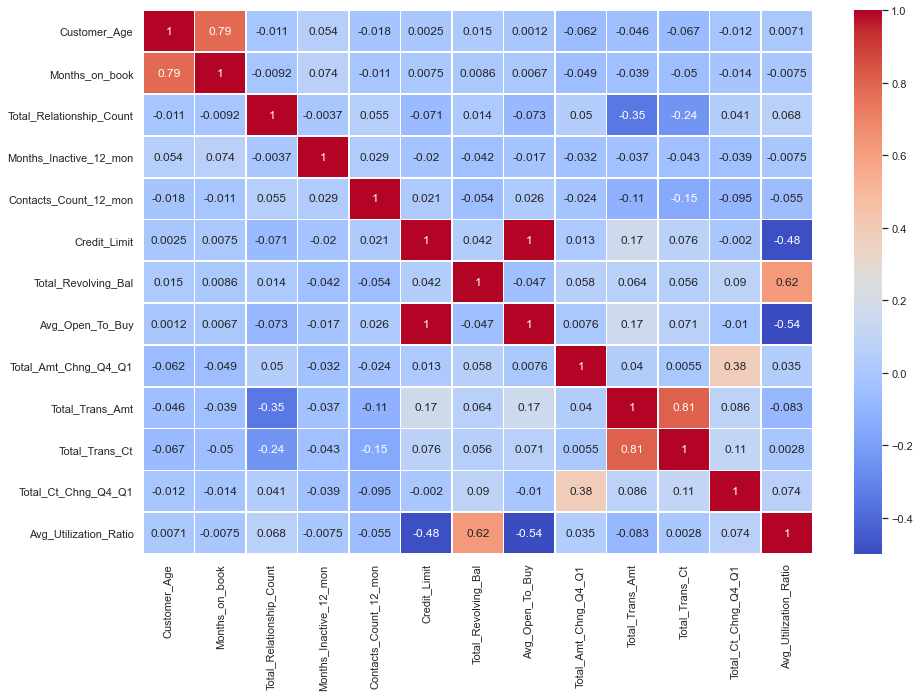

In [34]:
corr= df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot= True,vmin=-0.5,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

* Variables with Higher Positive Correlation:
    * Customer_Age and Months_on_Book
    * Total_Trans_Amt and Total_Trans_Ct
    * Avg_Utilization_Ratio and Total_Revolving_Bal
* Variables with Moderate to low Positive Correlation:
    * Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1
    * Credit_Limit and Total_Trans_Amt
* Variables with Higher Negative Correlation:
    * Avg_Utilization_Ratio and Avg_Open_To_Buy
    * Avg_Utilization_Ratio and Credit_Limit
* Variables with Moderate to Low Negative Correlation:
    * Total_Relationship_Count with both Total_Trans_Amt and Total_Trans_Ct
    * Contacts_Count_12_mon also with both Total_Trans_Amt and Total_Trans_Ct       

**Let's analyse these relationships further.**

In [35]:
#Let's group and plot certain Numerical variables together for a comparison study with the target variable
cols1 = df[['Total_Relationship_Count',
           'Months_Inactive_12_mon',
            'Contacts_Count_12_mon']].columns.tolist()
cols2 = df[['Credit_Limit',
           'Total_Revolving_Bal',
           'Avg_Open_To_Buy',
            'Avg_Utilization_Ratio'
            ]].columns.tolist()
cols3 = df[['Total_Trans_Amt',
           'Total_Trans_Ct',
           'Total_Ct_Chng_Q4_Q1',
            'Total_Amt_Chng_Q4_Q1']].columns.tolist()
cols4 = df[['Customer_Age','Months_on_book']]

In [36]:
#Creating a function to create Boxplots for the above groups numerical variables
def bi_plot(x):
    plt.figure(figsize=(9,7))
    for i,count in enumerate(x):
        plt.subplot(2,2,i+1)
        #plt.subplots_adjust(hspace=3, wspace=7)
        sns.boxplot(df['Attrition_Flag'],df[count],palette="YlOrBr_r",showmeans=True)
        plt.title('Attrition_Flag Vs '+count,fontsize=12,fontweight = 'bold')
        plt.tight_layout()
    

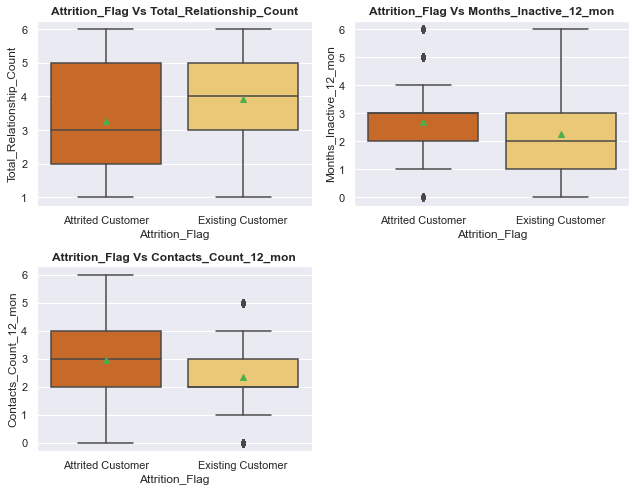

In [37]:
bi_plot(cols1)

* The Attrition is higher among customers who have more products with the bank.
* 50% of customers who were inactive for 3 months have attrited.
* The number of contacts with the banks among Attrited customers is higher than Existing Customers.
* The above plots suggests possible lack of efficient service to the customer could be a reason for the attrition. 

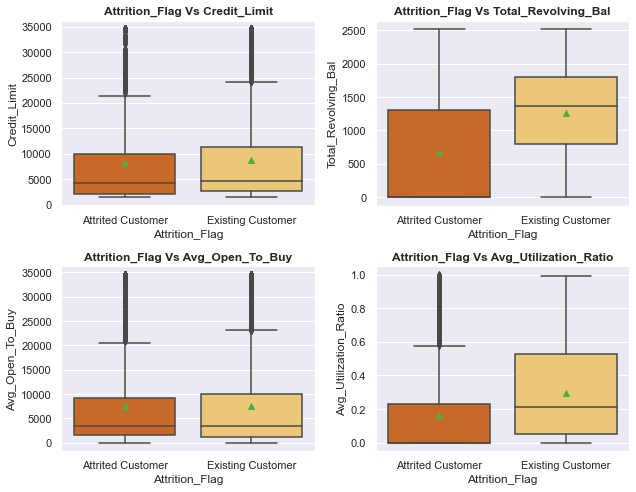

In [38]:
bi_plot(cols2)

* Mean Credit_Limit for both Attrited and Existing customers is almost equal with several outliers in the higher end for both.
* Mean Revolving Balance is comparatively low for Attrited Customers. 

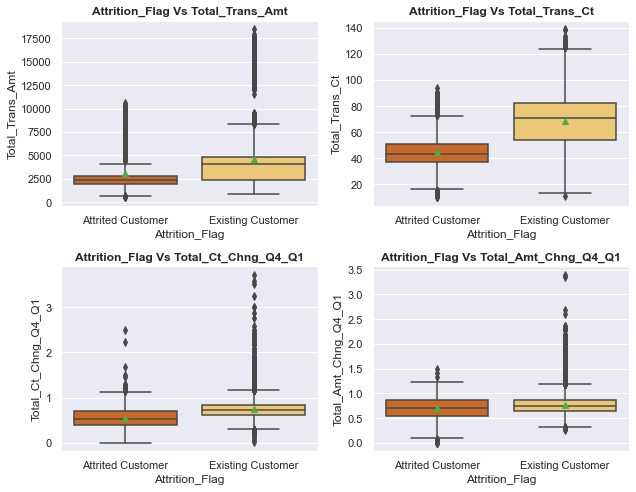

In [39]:
bi_plot(cols3)

* The median Total_Trans_Amt for Attrited Customers is almost 50% less than median Amount for Existing Customers. 
* Similarly, the median value for Total_Trans_Ct is also very low compared to Exisitng Customers
* This suggests that Customers who have low to reduced Card useage attrite.
* Both Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 have mean values less than 1, for Attrited Customers. This could suggest that the Customer Card useage decreased in Q4 compared to Q1.

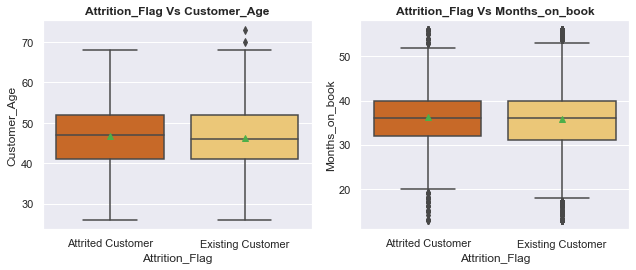

In [40]:
bi_plot(cols4)

* The median values for both Attrited and Existing Customers is almost equal in both Customer_Age and Months_on_book variables.

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

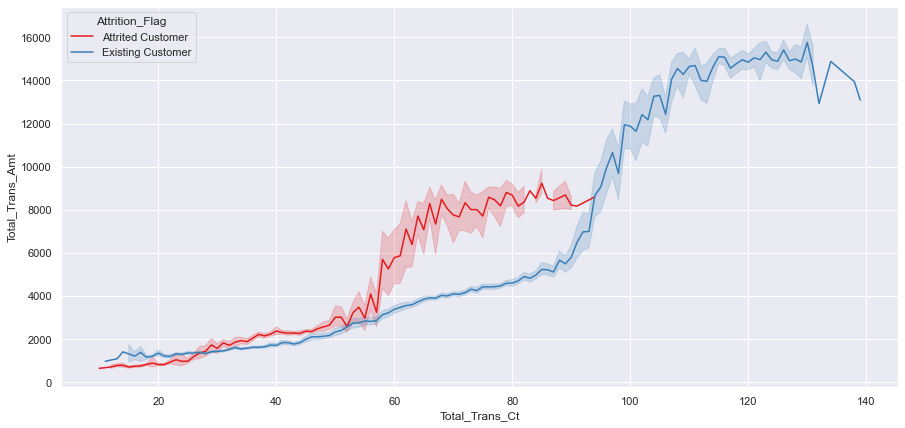

In [41]:
#  Total_Trans_Ct Vs Total_Trans_Amt
plt.figure(figsize=(15,7))
sns.lineplot(df.Total_Trans_Ct,df.Total_Trans_Amt,hue=df.Attrition_Flag)

* Customers with Transaction Amount less than 10000 and Transaction count less than 100 per year are more likely to cancel their Credit Card services. 

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Total_Amt_Chng_Q4_Q1'>

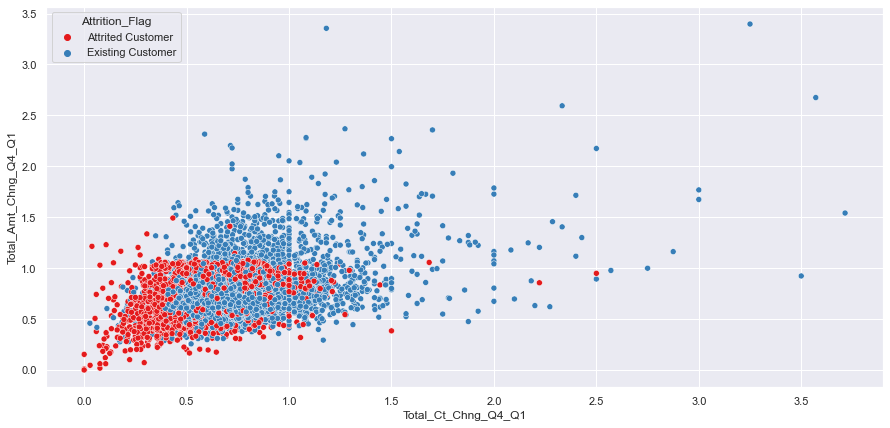

In [42]:
#Total_Ct_Chng_Q4_Q1 Vs Total_Amt_Chng_Q4_Q1
plt.figure(figsize=(15,7))
sns.scatterplot(x='Total_Ct_Chng_Q4_Q1', y='Total_Amt_Chng_Q4_Q1',hue='Attrition_Flag',
             data=df)

* Almost all Attrited Customers, Total amount ratio and Total count ratio is less than 1.0. 
* This suggests a possibility that these customers have reduced card useage in the last three months of the year.

<Figure size 1080x504 with 0 Axes>

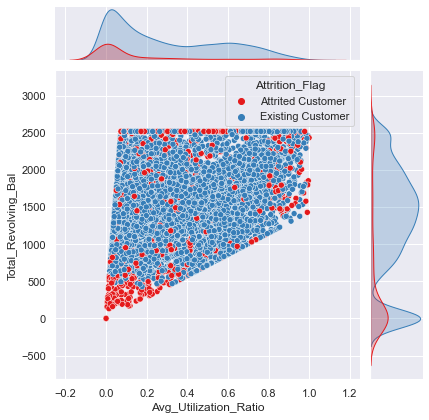

In [43]:
plt.figure(figsize=(15,7))
sns.jointplot(df.Avg_Utilization_Ratio,df.Total_Revolving_Bal,hue=df.Attrition_Flag)

* Attrition is higher on Customer with less than 0.2 Avg_Utilization_Ratio and lower Revolving_Bal values

### Outlier Detection and Treatment

In [44]:
outlier_num = df.select_dtypes(include=np.number)
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [45]:
round(((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100,3)

Avg_Open_To_Buy             9.509
Avg_Utilization_Ratio       0.000
CLIENTNUM                   0.000
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Customer_Age                0.020
Dependent_count             0.000
Months_Inactive_12_mon      3.268
Months_on_book              3.812
Total_Amt_Chng_Q4_Q1        3.910
Total_Ct_Chng_Q4_Q1         3.891
Total_Relationship_Count    0.000
Total_Revolving_Bal         0.000
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
dtype: float64

* As seen from the EDA, most of the Numerical Variables have outliers, with majority in the higher end.
* However, we will not be treating them as in a real-case scenario we want our model to learn from such informaton and gather identifiable patterns for the customers.

## Missing Value Treatment:
* We saw earlier that this dataset has no missing/null values.
* However, the `Education_Level, Marital_Status` and `Income_Category` have **Unknown** categories in them.
* We will replace the **Unknown** to null and use KNN imputer to impute missing values.
* KNNImputer: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.Nearest points are found based on euclidean distance.
## Data Preparation for model:

In [46]:
#replacing Unknown to null
for var in categorical_val:
    df[var]= df[var].replace('Unknown',np.nan)

In [47]:
# Percentage of missing values
round(df.isna().sum() / df.isna().count() * 100, 2)

Attrition_Flag               0.00
Customer_Age                 0.00
Gender                       0.00
Dependent_count              0.00
Education_Level             15.00
Marital_Status               7.40
Income_Category             10.98
Card_Category                0.00
Months_on_book               0.00
Total_Relationship_Count     0.00
Months_Inactive_12_mon       0.00
Contacts_Count_12_mon        0.00
Credit_Limit                 0.00
Total_Revolving_Bal          0.00
Avg_Open_To_Buy              0.00
Total_Amt_Chng_Q4_Q1         0.00
Total_Trans_Amt              0.00
Total_Trans_Ct               0.00
Total_Ct_Chng_Q4_Q1          0.00
Avg_Utilization_Ratio        0.00
dtype: float64

In [48]:
imputer = KNNImputer(n_neighbors=5) #setting imputer

In [49]:
cols_impute = ['Education_Level','Marital_Status','Income_Category']

In [50]:
df[cols_impute].head()

Education_Level Marital_Status Income_Category
0     High School        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3     High School            NaN  Less than $40K
4      Uneducated        Married     $60K - $80K

In [51]:
#label encoding each categories in the columns
education = {'Uneducated':1,'College':2,'High School':3, 'Graduation':4, 'Post-Graduate':5, 'Doctorate':6}
df['Education_Level']=df['Education_Level'].map(education)
marital_status = {'Married':1,'Single':2, 'Divorced':3}
df['Marital_Status']=df['Marital_Status'].map(marital_status)
income = {'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
df['Income_Category'] = df['Income_Category'].map(income)

In [52]:
df.head()

Attrition_Flag  Customer_Age Gender Dependent_count  Education_Level  \
0  Existing Customer            45      M               3              3.0   
1  Existing Customer            49      F               5              NaN   
2  Existing Customer            51      M               3              NaN   
3  Existing Customer            40      F               4              3.0   
4  Existing Customer            40      M               3              1.0   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0              1               3          Blue              39   
1              2               1          Blue              44   
2              1               4          Blue              36   
3            NaN               1          Blue              34   
4              1               3          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

* The Values have been encoded

### Split Data into Train and Test set

In [53]:
X= df.drop(['Attrition_Flag'],axis=1)
Y = df['Attrition_Flag'].apply(lambda x: x=='Attrited Customer').astype('int')

In [54]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=23,stratify=Y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [55]:
#Imputing missing values
#Fit and transform the train data
X_train[cols_impute]=imputer.fit_transform(X_train[cols_impute])

#Transform the test data 
X_test[cols_impute]=imputer.transform(X_test[cols_impute])

In [56]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All the missing values have been treated.
* Now we will reverse encode the values

In [57]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [58]:
inverse_mapping(education,'Education_Level')
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(income,'Income_Category')

In [59]:
#checking inverse encoding
cols = X_train.select_dtypes(include=['category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3736
M    3352
Name: Gender, dtype: int64
******************************
3    1901
2    1835
1    1298
4    1128
0     633
5     293
Name: Dependent_count, dtype: int64
******************************
High School      3170
College          1935
Uneducated       1041
Post-Graduate     357
Doctorate         307
Graduation        278
Name: Education_Level, dtype: int64
******************************
Married     3469
Single      3114
Divorced     505
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2495
$40K - $60K       1925
$80K - $120K      1086
$60K - $80K       1068
$120K +            514
Name: Income_Category, dtype: int64
******************************
Blue        6616
Silver       380
Gold          80
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [60]:
cols = X_test.select_dtypes(include=['category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

F    1622
M    1417
Name: Gender, dtype: int64
******************************
3    831
2    820
1    540
4    446
0    271
5    131
Name: Dependent_count, dtype: int64
******************************
High School      1322
College           855
Uneducated        446
Post-Graduate     159
Doctorate         144
Graduation        113
Name: Education_Level, dtype: int64
******************************
Married     1486
Single      1310
Divorced     243
Name: Marital_Status, dtype: int64
******************************
Less than $40K    1084
$40K - $60K        818
$60K - $80K        475
$80K - $120K       449
$120K +            213
Name: Income_Category, dtype: int64
******************************
Blue        2820
Silver       175
Gold          36
Platinum       8
Name: Card_Category, dtype: int64
******************************


* Inverse mapping is successful
* The **Unknown** category in the variables have been imputed.

### Encoding the categorical variables

In [61]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 33) (3039, 33)


In [62]:
print(y_train.shape,y_test.shape)

(7088,) (3039,)


## Building the model

### Model Evaluation Criterion:

**Model can make two kinds of wrong predictions:**
    
    1.Predicting that a customer will cancel their Credit Card services but doesnt : False Positive
    2. Predicting that a customer wont cancel their Credit Card servicebut does : False Negative

* The Bank's objective is to identify all potential Customer's who wish to close their Credit Card Services.
* Predicting that a Customer wont cancel their Card Serivces but they do end up attriting, will lead to loss. 
* Hence the False Negative values must be reduced

**Metric for Optimization**
* The Recall must be maximized to ensure lesser chances of False Negatives.

**Evaluating model performance**
* We will build different models with pipelines using `K-folds cross validation`
* This method will split the dataset in K-folds. It will train models on k-1 fold and test them in the last fold and generate k-modles and k-cross_val_scores. 
* We will then tune the best three models using **GridSearchCV and RandomSearchCV**, and find the optimal model for this dataset

### Confusion Matrix

In [63]:
def make_confusion_matrix(model,y_actual):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    y_predict = model.predict(X_test)
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
#Defining a function to calculate all the metric scores for the model
def scores(model,train_x,train_y,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)
    
    y_pred_train = model.predict(train_x)
    y_pred_test = model.predict(X_test)
    
    train_acc = metrics.accuracy_score(train_y,y_pred_train)
    test_acc = metrics.accuracy_score(y_test,y_pred_test)
    
    train_recall = metrics.recall_score(train_y,y_pred_train)
    test_recall = metrics.recall_score(y_test,y_pred_test)
    
    train_precision = metrics.precision_score(train_y,y_pred_train)
    test_precision = metrics.precision_score(y_test,y_pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(train_y,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(train_y,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(train_y,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
    elif flag == False:
        return score_list #return this when flag is False

### Model Building - Logistic Regression

In [65]:
#Creating a Pipeline to call the base Logistic regression model
pipe_lr = Pipeline(steps=[('scaler',StandardScaler()),
                         ('log_reg', LogisticRegression(solver='saga',n_jobs=-1,random_state=23))])

In [66]:
scoring='recall' #metric for optimization
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)#Setting number of splits equal to 5
cv_result=cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)


In [67]:
#Printing the CV scores of models
print(cv_result) 

[0.61403509 0.5745614  0.53508772 0.59471366 0.61842105]


* We see that the Recall performance for the train set ranges between 0.53 to 0.618.
* Let's check the performance on Test data

Accuracy on training set :  0.9063205417607223
Accuracy on test set :  0.9016123724909509

Recall on training set :  0.591747146619842
Recall on test set :  0.5635245901639344

Precision on training set :  0.7720504009163803
Precision on test set :  0.7617728531855956


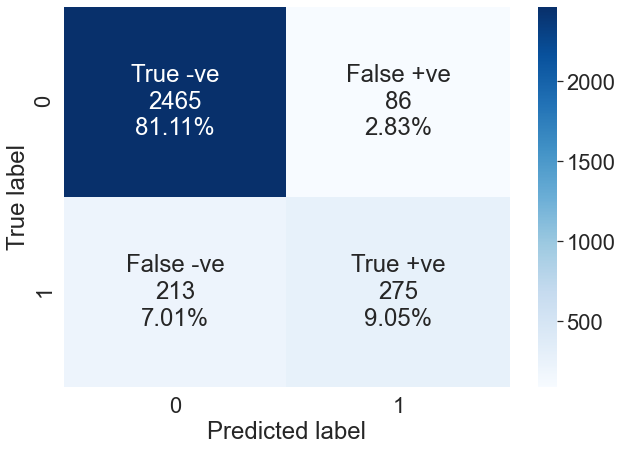

In [68]:
pipe_lr.fit(X_train, y_train)
make_confusion_matrix(pipe_lr,y_test)
scores(pipe_lr,X_train,y_train)

* **Logistic Regression**  has given a generalised performance on train and test set, but only identifies 9.05% of True Positives( Attrited Customers)
* The Recall score for test set is 0.563 and we will analyse if this can be improved by oversampling and undersampling

### SMOTE - Oversampling of train set 

* Let's check the total label counts in the train set

In [69]:
print('Before SMOTE, the value counts in y_train:',y_train.value_counts())

Before SMOTE, the value counts in y_train: 0    5949
1    1139
Name: Attrition_Flag, dtype: int64


In [70]:
#Synthetic Minority Over-sampling Technique
smote = SMOTE(k_neighbors=5,random_state=23)
X_train_Up, y_train_Up = smote.fit_resample(X_train,y_train)
print('After SMOTE, the value counts in y_train:',y_train_Up.value_counts())
print(f'After SMOTE, The Shape of X_train set{X_train_Up.shape}.')

After SMOTE, the value counts in y_train: 0    5949
1    5949
Name: Attrition_Flag, dtype: int64
After SMOTE, The Shape of X_train set(11898, 33).


In [71]:
#fitting the model on the oversampled train set
pipe_lr.fit(X_train_Up,y_train_Up) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(n_jobs=-1, random_state=23,
                                    solver='saga'))])

In [72]:
#K-fold Cross validation on the Oversampled dataset
scoring='recall' #metric for optimization
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)     #Setting number of splits equal to 5
cv_result=cross_val_score(estimator=pipe_lr, X=X_train_Up, y=y_train_Up, scoring=scoring, cv=kfold)
print(cv_result)

[0.89411765 0.91260504 0.91260504 0.92262405 0.9092437 ]


* The model performance range has increased to 0.89 to 0.922.
* Comparing with test performance

Accuracy on training set :  0.9219196503614053
Accuracy on test set :  0.8845014807502468

Recall on training set :  0.911413682971928
Recall on test set :  0.625

Precision on training set :  0.9309752747252747
Precision on test set :  0.6448202959830867


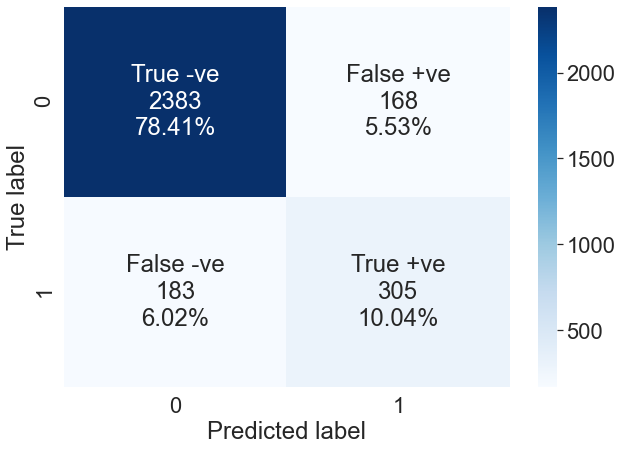

In [73]:
scores(pipe_lr,X_train_Up,y_train_Up)
make_confusion_matrix(pipe_lr,y_test)

* Though the performance on trainset has improved, but we see that the model is overfitting for the test set.
* We will perform Regularization on the model to see if it will reduce Overfitting   

In [74]:
# Choose the type of classifier. 
lr = LogisticRegression(random_state=23,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_Up,y_train_Up)

# Set the clf to the best combination of parameters
lr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr.fit(X_train_Up,y_train_Up)

LogisticRegression(C=0.1, random_state=23, solver='saga')

Accuracy on training set :  0.7013783829214995
Accuracy on test set :  0.8127673576834485

Recall on training set :  0.5542107917297024
Recall on test set :  0.5860655737704918

Precision on training set :  0.7853739876131491
Precision on test set :  0.43797856049004597


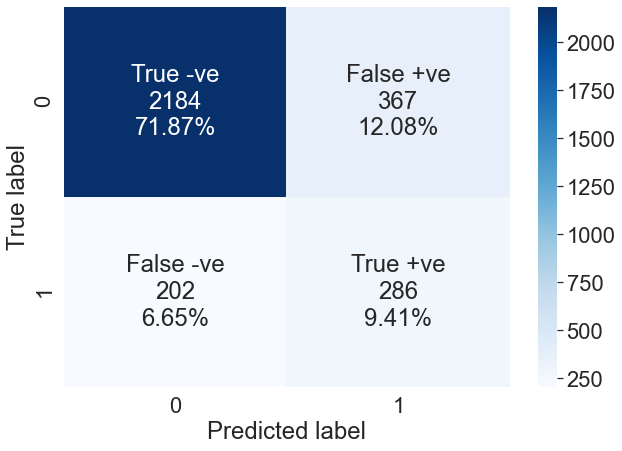

In [75]:
scores(lr,X_train_Up,y_train_Up)
make_confusion_matrix(lr,y_test)

* Regularization has reduced the overfit issues but the Recall Scores have dropped to 0.58 for test set.
* We will proceed with Undersampling

### Undersampling the trainset using RandomUnderSampler

In [76]:
rus = RandomUnderSampler(random_state = 23)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [77]:
print('After Undersampling, the value counts in y_train:',y_train_un.value_counts())
print(f'After Undersampling, The Shape of X_train set{X_train_un.shape}.')
print(f'After Undersampling, The Shape of y_train set{y_train_un.shape}.')

After Undersampling, the value counts in y_train: 0    1139
1    1139
Name: Attrition_Flag, dtype: int64
After Undersampling, The Shape of X_train set(2278, 33).
After Undersampling, The Shape of y_train set(2278,).


In [78]:
#Logistic Regression for undersampled train set
pipe_lr.fit(X_train_un,y_train_un)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(n_jobs=-1, random_state=23,
                                    solver='saga'))])

In [79]:
#K-fold Cross validation on the Undersampled dataset
scoring='recall' #metric for optimization
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)     #Setting number of splits equal to 5
cv_result=cross_val_score(estimator=pipe_lr, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
print(cv_result)

[0.84649123 0.85964912 0.87280702 0.82378855 0.83333333]


* The overall Performance range is between 0.823 to 0.872
* Compared to Upsampling, the score has increased. Let's compare with test performance

Accuracy on training set :  0.8467954345917471
Accuracy on test set :  0.8440276406712734

Recall on training set :  0.8507462686567164
Recall on test set :  0.8381147540983607

Precision on training set :  0.8440766550522648
Precision on test set :  0.5087064676616916


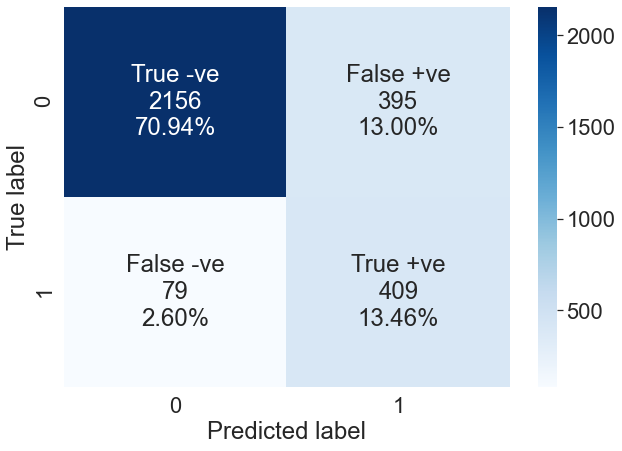

In [80]:
#checking the scores and Confusion matrix
scores(pipe_lr,X_train_un,y_train_un)
make_confusion_matrix(pipe_lr,y_test)

* The Logistic Regression model on Undersampled data has given a more generalised performance and also doesnt overfit.
* Test Recall has increased to 0.83
* We also see an increase in the True positive values but there is overfittin in Precision scores.
* Let us build other models to see if we can get a higher Recall values

### Model Building: Decision Tree, Random Forest, Bagging Classifier,Ada, Gradient and XG Boost

* We will use the `make_pipeline` function to create pipelines for all the models.
* This function does not need naming the estimators and will provide lowecase names of the types automatically.

In [81]:
#creating an empty list to store models
all_models = []

#Appending pipelines to the empty list
all_models.append( 
    ('DT',
     make_pipeline
     (DecisionTreeClassifier
      (random_state=23,class_weight={0:0.15,1:0.85})
     )))
all_models.append(('RF',
                   make_pipeline
                   (RandomForestClassifier
                    (random_state=23,class_weight={0:0.15,1:0.85})
                   )))
all_models.append(('Bg',make_pipeline
                   (BaggingClassifier(random_state=23)
                   )))
all_models.append(('ADA',make_pipeline
                   (AdaBoostClassifier(random_state=23)
                   )))
all_models.append(('GRB',make_pipeline
                   (GradientBoostingClassifier(random_state=23)
                   )))
all_models.append(('XGB',make_pipeline
                   (XGBClassifier(random_state=23,eval_metric='logloss')
                   )))

In [82]:
for i,j in all_models:
    j.fit(X_train,y_train)
    scoring='recall'
    kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)#Setting number of splits equal to 5
    #performing Cross-validation on undersampled train set
    cv_result=cross_val_score(estimator=j, X=X_train, y=y_train, scoring=scoring, cv=kfold) 
    print(f'{i}: {cv_result.mean()}')

DT: 0.7664541309220188
RF: 0.7102364943194992
Bg: 0.8024267717752531
ADA: 0.8340366334338049
GRB: 0.8445861349408764
XGB: 0.8840907334415334


In [83]:
for i,j in all_models:
    print(i)
    scores(j,X_train,y_train)
    print('-'*35)

DT
Accuracy on training set :  1.0
Accuracy on test set :  0.9368213228035538

Recall on training set :  1.0
Recall on test set :  0.7868852459016393

Precision on training set :  1.0
Precision on test set :  0.8135593220338984
-----------------------------------
RF
Accuracy on training set :  1.0
Accuracy on test set :  0.9460348798947023

Recall on training set :  1.0
Recall on test set :  0.7254098360655737

Precision on training set :  1.0
Precision on test set :  0.921875
-----------------------------------
Bg
Accuracy on training set :  0.9977426636568849
Accuracy on test set :  0.9536031589338598

Recall on training set :  0.9877085162423178
Recall on test set :  0.8012295081967213

Precision on training set :  0.9982253771073647
Precision on test set :  0.8988505747126436
-----------------------------------
ADA
Accuracy on training set :  0.9616252821670429
Accuracy on test set :  0.9601842711418229

Recall on training set :  0.8542581211589113
Recall on test set :  0.825819672

* From the above scores we see that the three best models are ADAboost,Gradientboost and XGBoost.
* XGboost seems to have overfit issues comapred to the others.
* Let's tune the models to see if we can improve the performance
### Hyperparameter Tuning 
#### ADA Boost - GridSearchCV

In [84]:
%%time
#Creating pipeline
pipe_ADA = make_pipeline(AdaBoostClassifier(random_state=23))

# Parameter Grid
parameters = {
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=23),
                                         DecisionTreeClassifier(max_depth=2,random_state=23),
                                         DecisionTreeClassifier(max_depth=3,random_state=23)],
    "adaboostclassifier__n_estimators": np.arange(10,60,5),
    "adaboostclassifier__learning_rate": [0.05,0.15,0.45,0.75]} 

#scoring metric
scoring = metrics.make_scorer(metrics.recall_score)

# GridSearch CV
GS_cv = GridSearchCV(estimator=pipe_ADA,param_grid=parameters,scoring=scoring,cv=5,n_jobs=-1)
GS_cv.fit(X_train,y_train)

print(GS_cv.best_params_)
print(GS_cv.best_score_)

{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=23), 'adaboostclassifier__learning_rate': 0.75, 'adaboostclassifier__n_estimators': 55}
0.8858798979828426
Wall time: 2min 56s


In [85]:
#creating new pipeline with the best parameters 
ada_tuned = make_pipeline(AdaBoostClassifier
                         (base_estimator=DecisionTreeClassifier(max_depth=2, random_state=23),
                         learning_rate=0.75,
                         n_estimators= 55,
                         random_state=23))
#fitting model on train data
ada_tuned.fit(X_train,y_train)

Pipeline(steps=[('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=23),
                                    learning_rate=0.75, n_estimators=55,
                                    random_state=23))])

Accuracy on training set :  0.9843397291196389
Accuracy on test set :  0.9664363277393879

Recall on training set :  0.9385425812115891
Recall on test set :  0.8770491803278688

Precision on training set :  0.9630630630630631
Precision on test set :  0.9106382978723404


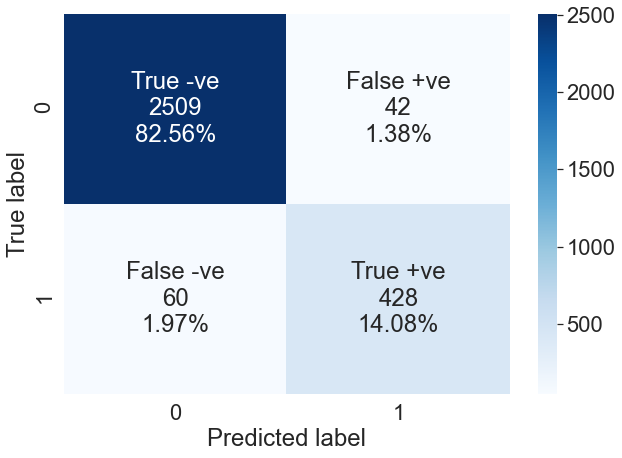

In [86]:
#calculate the metric scores
scores(ada_tuned,X_train,y_train)
make_confusion_matrix(ada_tuned,y_test)

* The test recall has increased to 0.877 compared to K-foldCV recall
* The Accuracy scores for both train and test set are comparable and close.
#### ADA Boost - RandomizedSearchCV

In [87]:
%%time
#Creating pipeline
pipe_ADA2 = make_pipeline(AdaBoostClassifier(random_state=23))

# Parameter Grid
parameters = {
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=23),
                                         DecisionTreeClassifier(max_depth=2,random_state=23),
                                         DecisionTreeClassifier(max_depth=3,random_state=23)],
    "adaboostclassifier__n_estimators": np.arange(10,60,5),
    "adaboostclassifier__learning_rate": [0.05,0.15,0.45,0.75]} 
                                                   

#scoring metric
scoring = metrics.make_scorer(metrics.recall_score)

# GridSearch CV
RS_cv = RandomizedSearchCV(estimator=pipe_ADA2,scoring=scoring,param_distributions=parameters,random_state=23,n_iter=50,n_jobs=-1,cv=5)
RS_cv.fit(X_train,y_train)

print(RS_cv.best_params_)
print(RS_cv.best_score_)

{'adaboostclassifier__n_estimators': 45, 'adaboostclassifier__learning_rate': 0.75, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=23)}
0.8823672617667517
Wall time: 1min 39s


In [88]:
#creating new pipeline with the best parameters 
ada_tuned2 = make_pipeline(AdaBoostClassifier
                         (base_estimator=DecisionTreeClassifier(max_depth=2, random_state=23),
                         learning_rate=0.75,
                         n_estimators= 45,
                         random_state=23))
#fitting model on train data
ada_tuned2.fit(X_train,y_train)

Pipeline(steps=[('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=23),
                                    learning_rate=0.75, n_estimators=45,
                                    random_state=23))])

Accuracy on training set :  0.9803893905191874
Accuracy on test set :  0.9654491609081934

Recall on training set :  0.9236172080772608
Recall on test set :  0.8668032786885246

Precision on training set :  0.9528985507246377
Precision on test set :  0.9136069114470843


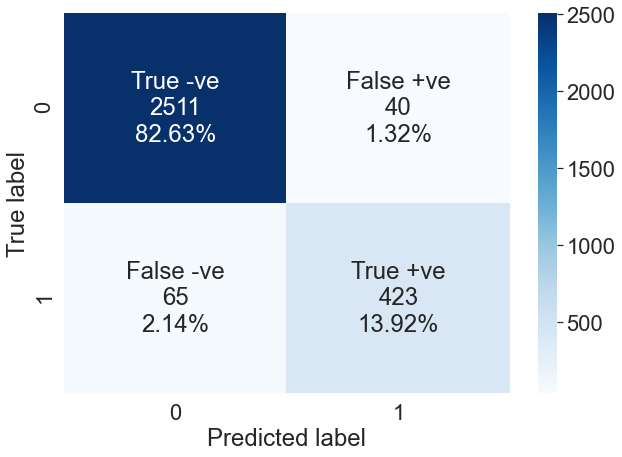

In [89]:
#calculate the metric scores
scores(ada_tuned2,X_train,y_train)
make_confusion_matrix(ada_tuned2,y_test)

* The RandomSearch Ada boost took lesser time but the Recall Score for test set dropped to 0.866
* This model has minor overfit issues in Recall and Precision scores

### Hyperparameter Tuning with GridSearch
#### Gradient Boost - GridSearchCV

In [90]:
%%time
#Creating pipeline
pipe_GRB = make_pipeline(GradientBoostingClassifier(random_state=23))
# Parameter Grid
parameters = {
    "gradientboostingclassifier__n_estimators": np.arange(20,100,20),
    "gradientboostingclassifier__max_features":[0.6,0.7,0.8,0.9],
    'gradientboostingclassifier__learning_rate': [0.01,0.05,0.35,0.5],
    'gradientboostingclassifier__subsample':[0.6,0.7,0.8,0.9]
    }

#scoring metric
scoring = metrics.make_scorer(metrics.recall_score)

# GridSearch CV
GS_cv = GridSearchCV(estimator=pipe_GRB,param_grid=parameters,scoring=scoring,cv=5,n_jobs=-1)
GS_cv.fit(X_train,y_train)

print(GS_cv.best_params_)
print(GS_cv.best_score_)

{'gradientboostingclassifier__learning_rate': 0.35, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__n_estimators': 80, 'gradientboostingclassifier__subsample': 0.9}
0.8814746116392301
Wall time: 6min 26s


In [91]:
#creating new pipeline with the best parameters 
grb_tuned = make_pipeline(GradientBoostingClassifier
                          (learning_rate=0.35,
                           max_features=0.8,
                           n_estimators=80,
                          subsample = 0.9,random_state=23))
                                                                                      
#fitting model on train data
grb_tuned.fit(X_train,y_train)

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.35,
                                            max_features=0.8, n_estimators=80,
                                            random_state=23, subsample=0.9))])

Accuracy on training set :  0.9929458239277652
Accuracy on test set :  0.9677525501809806

Recall on training set :  0.9727831431079894
Recall on test set :  0.8729508196721312

Precision on training set :  0.9831410825199645
Precision on test set :  0.922077922077922


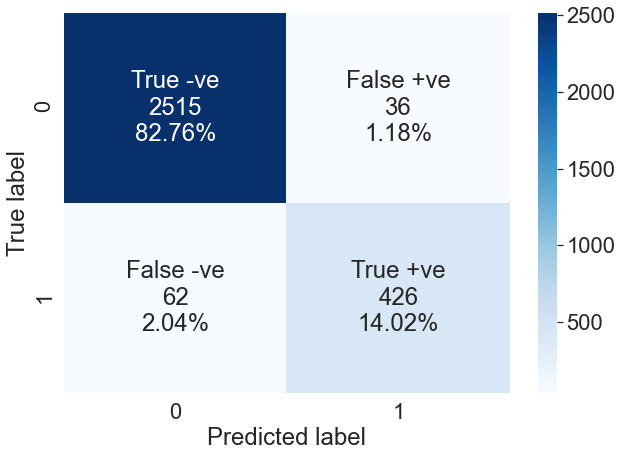

In [92]:
#calculate the metric scores
scores(grb_tuned,X_train,y_train)
make_confusion_matrix(grb_tuned,y_test)

* The test Recall has increased to 0.872 compared to K-fold CV recall
* However, we see that the model is overfitting slightly
### GradientBoost - RandomizedSearchCV

In [93]:
%%time
#Creating pipeline
pipe_GRB2 = make_pipeline(GradientBoostingClassifier(random_state=23))
# Parameter Grid
parameters = {
    "gradientboostingclassifier__n_estimators": np.arange(20,100,20),
    "gradientboostingclassifier__max_features":[0.6,0.7,0.8,0.9],
    'gradientboostingclassifier__learning_rate': [0.01,0.05,0.35,0.5],
    'gradientboostingclassifier__subsample':[0.6,0.7,0.8,0.9]
    }

#scoring metric
scoring = metrics.make_scorer(metrics.recall_score)

RS_cv = RandomizedSearchCV(estimator=pipe_GRB2,
                           scoring=scoring,
                           param_distributions=parameters,
                           random_state=23,n_iter=50,n_jobs=-1,cv=5)
RS_cv.fit(X_train,y_train)

print(RS_cv.best_params_)
print(RS_cv.best_score_)

{'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 80, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__learning_rate': 0.35}
0.8779581111368732
Wall time: 1min 4s


In [94]:
#creating new pipeline with the best parameters 
grb_tuned2 = make_pipeline(GradientBoostingClassifier
                          (learning_rate=0.35,
                           max_features=0.8,
                           n_estimators=80,random_state=23,
                          subsample = 0.8))
                                                                                      
#fitting model on train data
grb_tuned2.fit(X_train,y_train)

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.35,
                                            max_features=0.8, n_estimators=80,
                                            random_state=23, subsample=0.8))])

Accuracy on training set :  0.9930869074492099
Accuracy on test set :  0.9700559394537677

Recall on training set :  0.971027216856892
Recall on test set :  0.8770491803278688

Precision on training set :  0.9857397504456328
Precision on test set :  0.9324618736383442


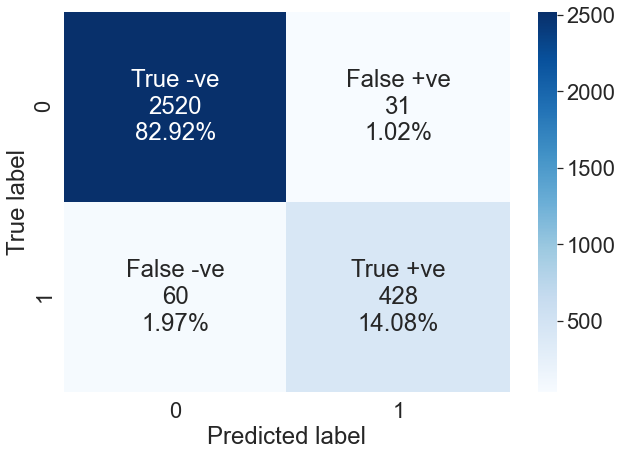

In [95]:
#calculate the metric scores
scores(grb_tuned2,X_train,y_train)
make_confusion_matrix(grb_tuned2,y_test)

* The Recall score has dropped slighltly compared to GridSearchCV

### Hyperparameter Tuning 
#### XG Boost - GridSearchCV

In [96]:
%%time
#Creating pipeline
pipe_XBG = make_pipeline(
                   (XGBClassifier
                    (random_state=23,eval_metric='logloss')
                   ))

# Parameter Grid
parameters = {
    "xgbclassifier__n_estimators": np.arange(30,150,20),
     "xgbclassifier__subsample":[0.6,0.7,0.8],
    "xgbclassifier__learning_rate":[0.05,0.15,0.2,0.3],
    "xgbclassifier__gamma":[0,1,2,3],
    }

#scoring metric
scoring = metrics.make_scorer(metrics.recall_score)

# GridSearch CV
GS_cv = GridSearchCV(estimator=pipe_XBG,param_grid=parameters,scoring=scoring,cv=5,n_jobs=-1)
GS_cv.fit(X_train,y_train)

print(GS_cv.best_params_)
print(GS_cv.best_score_)

{'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__n_estimators': 130, 'xgbclassifier__subsample': 0.7}
0.8920241131463019
Wall time: 18min 53s


In [97]:
#creating new pipeline with the best parameters 
xgb_tuned = make_pipeline(
                   (XGBClassifier
                    (random_state=23,
                     eval_metric='logloss',
                    learning_rate = 0.15,
                    n_estimators = 130,
                    subsample = 0.7,
                     gamma = 0
                    )))
#fitting model on train data
xgb_tuned.fit(X_train,y_train)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.15,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=130,
                               n_jobs=4, num_parallel_tree=1, random_state=23,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9998589164785553
Accuracy on test set :  0.9690687726225732

Recall on training set :  0.9991220368744512
Recall on test set :  0.8709016393442623

Precision on training set :  1.0
Precision on test set :  0.9320175438596491


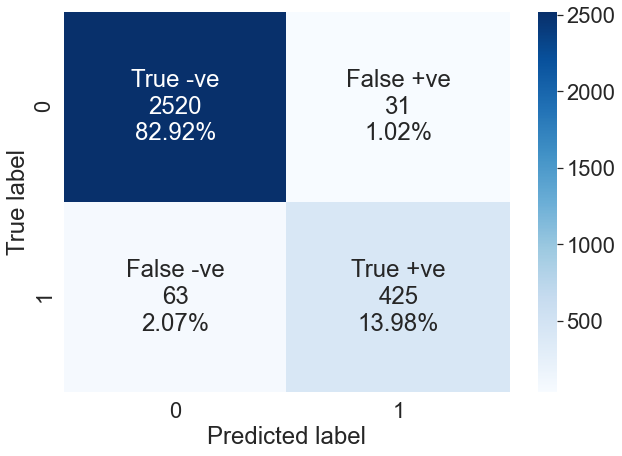

In [98]:
#calculate the metric scores
scores(xgb_tuned,X_train,y_train)
make_confusion_matrix(xgb_tuned,y_test)

* The test Recall has increased to 0.87 compared to K-foldCV recall.

### XGBoost - RandomizedSearchCV

In [99]:
%%time
#Creating pipeline
pipe_XBG2 = make_pipeline(
                   (XGBClassifier
                    (random_state=23,eval_metric='logloss')
                   ))

# Parameter Grid
parameters = {
    "xgbclassifier__n_estimators": np.arange(30,150,20),
     "xgbclassifier__subsample":[0.6,0.7,0.8],
    "xgbclassifier__learning_rate":[0.05,0.15,0.2,0.3],
    "xgbclassifier__gamma":[0,1,2,3],
    }
#scoring metric
scoring = metrics.make_scorer(metrics.recall_score)

#RandomizedSearch CV
RS_cv = RandomizedSearchCV(estimator=pipe_XBG2,
                           scoring=scoring,
                           param_distributions=parameters,
                           random_state=23,n_iter=50,n_jobs=-1,cv=5)
RS_cv.fit(X_train,y_train)

print(RS_cv.best_params_)
print(RS_cv.best_score_)

{'xgbclassifier__subsample': 0.7, 'xgbclassifier__n_estimators': 90, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__gamma': 0}
0.8902658628951233
Wall time: 4min 3s


In [100]:
#creating new pipeline with the best parameters 
xgb_tuned2 = make_pipeline(
                   (XGBClassifier
                    (random_state=23,
                     eval_metric='logloss',
                    learning_rate = 0.15,
                    n_estimators =90,
                    subsample = 0.7,
                    gamma = 0
                    )))
#fitting model on train data
xgb_tuned2.fit(X_train,y_train)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.15,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=90,
                               n_jobs=4, num_parallel_tree=1, random_state=23,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9984480812641083
Accuracy on test set :  0.9687397170121751

Recall on training set :  0.9920983318700615
Recall on test set :  0.8647540983606558

Precision on training set :  0.9982332155477032
Precision on test set :  0.9356984478935698


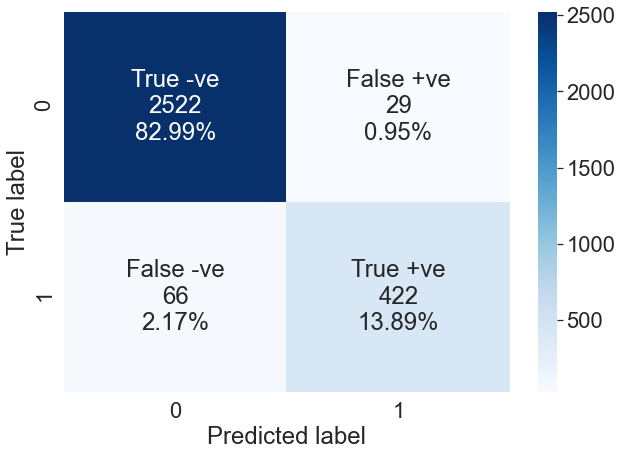

In [101]:
#calculate the metric scores
scores(xgb_tuned2,X_train,y_train)
make_confusion_matrix(xgb_tuned2,y_test)

* The Recall value for test set has dropped slightly than GridSearch

### Comparing all Models:

In [106]:
models = [ada_tuned,ada_tuned2,grb_tuned,
          grb_tuned2,xgb_tuned,xgb_tuned2]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = [] 
recall_test = []
precision_train = [] 
precision_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in models:
    j = scores(model,X_train,y_train,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [107]:
comparison_frame = pd.DataFrame({'Model':['ADA_Boost-GridSearchCV','ADA_Boost-RandomizedSearchCV',
                                          'Gradient_Boost-GridSearchCV','Gradient_Boost-RandomizedSearchCV',
                                          'XG_Boost-GridSearchCV','XG_Boost-RandomizedSearchCV'],
                                 'Total Time':['2min56s','1min39s','6min26s','1min4s','18min53s','4min3s'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train, 'Test_Recall':recall_test,
                                           'Train_Precision':precision_train, 'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False).reset_index()


index                              Model Total Time  Train_Accuracy  \
0      0             ADA_Boost-GridSearchCV    2min56s        0.984340   
1      3  Gradient_Boost-RandomizedSearchCV     1min4s        0.993087   
2      2        Gradient_Boost-GridSearchCV    6min26s        0.992946   
3      4              XG_Boost-GridSearchCV   18min53s        0.999859   
4      1       ADA_Boost-RandomizedSearchCV    1min39s        0.980389   
5      5        XG_Boost-RandomizedSearchCV     4min3s        0.998448   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.966436      0.938543     0.877049         0.963063        0.910638  
1       0.970056      0.971027     0.877049         0.985740        0.932462  
2       0.967753      0.972783     0.872951         0.983141        0.922078  
3       0.969069      0.999122     0.870902         1.000000        0.932018  
4       0.965449      0.923617     0.866803         0.952899        0.913607  
5       0.968740      0.992098     0.864754         0.998233        0.935698

### Conclusion
* From the above table we see that `ADA_Boost-GridSearchCV` has the highest Recall Score of 0.877
* The Model also an overall generalized performance scores with slight overfit issues in  Recall and Precision. 
* Nevertheless, we will choose this model as the best fit model for the dataset

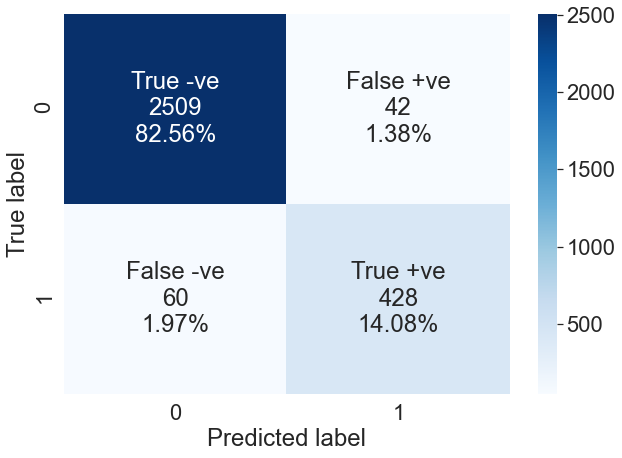

In [108]:
make_confusion_matrix(ada_tuned,y_test)

* The True Positive values is at 14.08% and the False Negative values are quite low at 1.97%.
* Let's see the important features for this model.

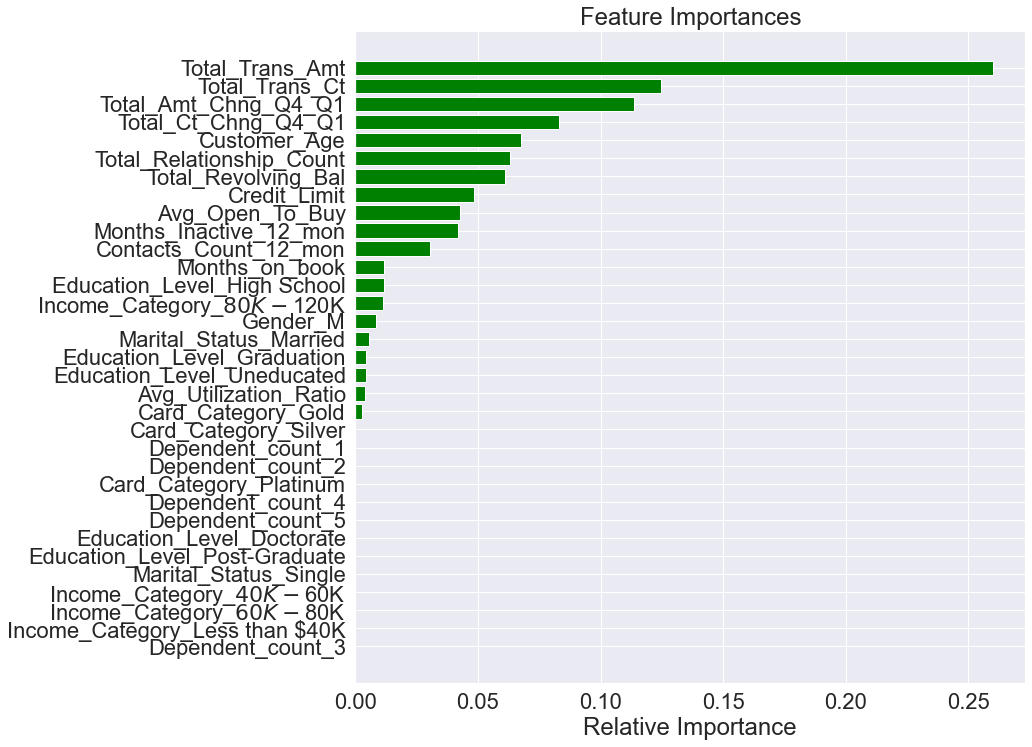

In [109]:
feature_names = X_train.columns
importances = ada_tuned[0].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features with relative importance greater than 0.1 are:
    * Total_Trans_Amt
    * Total_Trans_Ct
    * Total_Amt_Chng_Q4_Q1
    
* Subsequent features of relative importnace:
    * Total_Ct_Chng_Q4_Q1
    * Customer_Age
    * Total_Relationship_Count
    * Total_Revolving_Bal

### Misclassification Analysis
* To check if there is any pattern on the incorrectly classified samples by our chosen model. 

In [112]:
data1 = data.copy() #making a new copy from the original dataset

In [113]:
data1.drop(['CLIENTNUM'],axis=1,inplace = True)
data1['Dependent_count'] = data1['Dependent_count'].astype('category')
cols = data1.select_dtypes(['object']) #selecting all object datatype
for i in cols.columns:
    data1[i] = data1[i].astype('category')#converting them to category datatype
    data1[i] = data1[i].replace('Unknown',np.nan) #replacing the unknown as missing values

In [115]:
data1 = data1.dropna() #dropping all missing values

In [116]:
A= data1.drop(['Attrition_Flag'],axis=1)
B = data1['Attrition_Flag'].apply(lambda x: x=='Attrited Customer').astype('int')

In [118]:
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.3,random_state=1,stratify=B)
print(A_train.shape, A_test.shape)

(4956, 19) (2125, 19)


In [119]:
A_train=pd.get_dummies(A_train,drop_first=True)
A_test=pd.get_dummies(A_test,drop_first=True)
print(A_train.shape, A_test.shape)

(4956, 33) (2125, 33)


In [120]:
final_pred_test = ada_tuned.predict(A_test) #applying AdaBoost Gridsearch model on the test set

In [123]:
data_frame = data1.loc[A_test.index] #selecting rows with same index as test set
data_frame['Predicted'] = final_pred_test
#Replacing the dependent variable values to Binary outputs
data_frame['Attrition_Flag']=data_frame['Attrition_Flag'].apply(lambda x: x=='Attrited Customer').astype('int')
data_frame.head()

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
8109               1            41      F               2       Doctorate   
9551               1            46      M               0         College   
8369               0            50      F               0     High School   
9072               0            43      M               2     High School   
70                 0            51      M               4        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
8109        Married     $40K - $60K          Blue              33   
9551         Single    $80K - $120K          Blue              39   
8369        Married     $40K - $60K          Blue              43   
9072        Married     $60K - $80K          Blue              37   
70           Single         $120K +          Blue              42   

      Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
8109                         1  ...                      3        1604.0   
9551                         2  ...                      3       16983.0   
8369                         2  ...                      1        4154.0   
9072                         1  ...                      3        2600.0   
70                           3  ...                      3       34516.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
8109                    0           1604.0                 0.644   
9551                    0          16983.0                 1.061   
8369                 1060           3094.0                 0.544   
9072                 2047            553.0                 0.749   
70                   1763          32753.0                 1.266   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
8109             2264              47                0.516   
9551             8526              79                0.837   
8369             4325              86                0.720   
9072             8804             111                0.682   
70               1550              41                1.050   

      Avg_Utilization_Ratio  Predicted  
8109                  0.000          1  
9551                  0.000          1  
8369                  0.255          0  
9072                  0.787          0  
70                    0.051          0  

[5 rows x 21 columns]

In [124]:
#identifying the misclassification
comparison_column = np.where(data_frame["Predicted"] == data_frame["Attrition_Flag"], True, False) 
data_frame['Misclassification'] = comparison_column
data_frame['Misclassification'].value_counts()

True     2074
False      51
Name: Misclassification, dtype: int64

* There are 51 misclassified results on this test set

In [126]:
incorrect =data_frame[data_frame['Misclassification']== False] # Grouping only the misidentified rows 
incorrect.head()

Attrition_Flag  Customer_Age Gender Dependent_count Education_Level  \
4851               1            41      F               3        Graduate   
7402               1            52      F               2        Graduate   
9906               1            57      F               1      Uneducated   
5277               1            29      F               1      Uneducated   
2314               0            57      M               2        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
4851         Single     $40K - $60K          Blue              31   
7402        Married  Less than $40K          Blue              36   
9906         Single  Less than $40K          Blue              46   
5277         Single  Less than $40K          Blue              36   
2314        Married         $120K +          Blue              49   

      Total_Relationship_Count  ...  Credit_Limit  Total_Revolving_Bal  \
4851                         4  ...        5655.0                 1154   
7402                         5  ...        2160.0                    0   
9906                         2  ...        9129.0                    0   
5277                         3  ...        2516.0                 2312   
2314                         6  ...        4698.0                  984   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
4851           4501.0                 0.702             2189              51   
7402           2160.0                 0.645             2360              56   
9906           9129.0                 0.733             7733              81   
5277            204.0                 0.625             2321              36   
2314           3714.0                 0.373             1865              35   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Predicted  Misclassification  
4851                0.700                  0.204          0              False  
7402                0.647                  0.000          0              False  
9906                0.884                  0.000          0              False  
5277                0.500                  0.919          0              False  
2314                0.458                  0.209          1              False  

[5 rows x 22 columns]

In [127]:
# For pandas profiling
from pandas_profiling import ProfileReport
#Crearting a Pandas Profile report to identify pattern
profile  = ProfileReport(incorrect,title = 'Misclassification Pattern Profile',minimal=True) 
profile.to_widgets()

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**Misclassification Patterns**

* About 2.4% of the test set is misclassified showing that the model has over 97% Accuracy which is good.

* The significant misidentified variables are;
* Customers will less than $10,000 Credit Limit

* 40% of misidentified Customers have Total_Revolving_Bal at 0.0
* Most of the misclassified have less than $10,000 transaction amount and less than 100 transaction counts, proving that these two variables are the most important features in identifying customers who wish to cancel their card